**Линейные модели в машинном обучении**

**Описание проекта**

Проект направлен на разработку модели машинного обучения для молочного хозяйства «Вольный луг», с целью оптимизации процесса выбора бурёнок для расширения стада. Фермер хочет обеспечить стабильный уровень производства молока (не менее 6000 кг в год) и удовлетворять собственным критериям качества, касающимся вкуса молока. Для достижения этой цели будет разработано две модели: первая будет прогнозировать удой бурёнки, а вторая — вероятность того, что молоко будет соответствовать требованиям по вкусу. Данные для анализа предоставит ассоциация пастбищ «ЭкоФерма», что позволит создать надежные и обоснованные прогнозы.

**Цели проекта**
- Прогнозирование удоя: Создание модели, способной оценить возможный удой коровы на основе имеющихся характеристик (возраст, порода, состав корма и др.).
- Оценка вкуса молока: Разработка модели, определяющей вероятность того, что молоко будет вкусным, с учетом персонализированных критериев фермера.
- Оптимизация процесса покупки: Обеспечение фермера инструментами для принятия более информированных решений при выборе коров для покупки, что минимизирует риски и увеличивает производительность молочного хозяйства.

**Ход исследования**
- Шаг 1: [Загрузка и изучение данных](#загрузка)
- Шаг 2: [Предобработка данных](#предобработка)
- Шаг 3: [Исследовательский анализ данных](#исследовательский)
- Шаг 4: [Корреляционный анализ](#корреляционный)
- Шаг 5: [Задача регрессии](#обучение)
- Шаг 6: [Задача классификации](#обучение_модели)

**Описание данных:**
Файл *ferma_main.csv* содержит данные о стаде фермера на текущий момент:
- `id` — уникальный идентификатор коровы.
- `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
- `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
- `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
- `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Жирность,%` — содержание жиров в молоке (в процентах).
- `Белок,%` — содержание белков в молоке (в процентах).
- `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Файл *ferma_dad.csv* хранит имя папы каждой коровы в стаде фермера:
- `id` — уникальный идентификатор коровы.
- `Имя Папы` — имя папы коровы.

Файл *cow_buy.csv* — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой:
- `Порода` — порода коровы.
- `Тип пастбища` — ландшафт лугов, на которых паслась корова.
- `порода папы_быка` — порода папы коровы.
- `Имя_папы` — имя папы коровы.
- `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
- `Текущий_уровень_белок,%-` — содержание белков в молоке (в процентах).
- `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

<a id='загрузка'></a>
## Загрузка данных

In [1]:
# Импортируем библиотеки и модули
!pip install phik -q
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from phik import phik_matrix
from scipy import stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    accuracy_score, precision_score,
    recall_score, 
    confusion_matrix, 
    precision_recall_curve
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# Загрузка данных в DataFrame
df_ferma = pd.read_csv('/datasets/ferma_main.csv', sep = ';', decimal = ',')
df_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal = ',')
df_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal = ',')

In [3]:
def analyze_dataframe(df):
    # ANSI код для жирного текста
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    
    # Вывод общей информации о данных
    print(f"\n{bold_start}Общая информация о DataFrame:{bold_end}\n")
    df.info()
    
    # Вывод первых 5 строк
    print(f"{bold_start}Первые 5 строк:{bold_end}")
    display(df.head())
    
    # Количество дубликатов
    duplicates = df.duplicated().sum()
    print(f"\n{bold_start}Количество дубликатов:{bold_end} {duplicates}")
    
    # Проверка на пропуски в данных
    print(f"\n{bold_start}Пропуски в каждом столбце:{bold_end}")
    display(df.isnull().sum())

analyze_dataframe(df_ferma)


Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет



Количество дубликатов: 5

Пропуски в каждом столбце:


id                                       0
Удой, кг                                 0
ЭКЕ (Энергетическая кормовая единица)    0
Сырой протеин, г                         0
СПО (Сахаро-протеиновое соотношение)     0
Порода                                   0
Тип пастбища                             0
порода папы_быка                         0
Жирность,%                               0
Белок,%                                  0
Вкус молока                              0
Возраст                                  0
dtype: int64

Необходимо:
- Привести названия столбцов к одному регистру и заменить пробелы на символы подчеркивания (_) для удобства работы с DataFrame 
- Удалить явные и неявные дубликаты.

In [4]:
analyze_dataframe(df_dad)


Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB
Первые 5 строк:


,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин



Количество дубликатов: 0

Пропуски в каждом столбце:


id          0
Имя Папы    0
dtype: int64

Нуобходимо:
- Привести названия столбцов к одному регистру и заменить пробелы на символы подчеркивания (_) для удобства работы с DataFrame
- Проверить неявные дубликаты

In [5]:
analyze_dataframe(df_buy)


Общая информация о DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB
Первые 5 строк:


,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет



Количество дубликатов: 4

Пропуски в каждом столбце:


Порода                     0
Тип пастбища               0
порода папы_быка           0
Имя_папы                   0
Текущая_жирность,%         0
Текущий_уровень_белок,%    0
Возраст                    0
dtype: int64

Необходимо:

- Привести названия столбцов к одному регистру и заменить пробелы на символы подчеркивания (_) для удобства работы с DataFrame
- Обнаружено 4 явных дубликата. Убирать их не будем, поскольку данных в датасете мало, как и признаков. Вполне вероятно, что данные и признаки сходятся для разных коров

In [6]:
# Выводим названия сттолбцов для трех DataFrames
print(f'Названия столбцов df_ferma: {df_ferma.columns}')
print(f'Названия столбцов df_dad: {df_dad.columns}')
print(f'Названия столбцов df_buy: {df_buy.columns}')

Названия столбцов df_ferma: Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')
Названия столбцов df_dad: Index(['id', 'Имя Папы'], dtype='object')
Названия столбцов df_buy: Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')


In [7]:
# Словарь с заменами для df_ferma
rename_ferma = {
    'Удой, кг': 'milk_yield_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'energy_feed_unit',
    'Сырой протеин, г': 'crude_protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'sire_breed',
    'Жирность,%': 'fat_percentage',
    'Белок,%': 'protein_percentage',
    'Вкус молока': 'milk_flavor',
    'Возраст': 'age'
}

# Словарь с заменами для df_dad
rename_dad = {
    'Имя Папы': 'sire_name'
}

# Словарь с заменами для df_buy
rename_buy = {
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'sire_breed',
    'Имя_папы': 'sire_name',
    'Текущая_жирность,%': 'current_fat_percentage',
    'Текущий_уровень_белок,%': 'current_protein_percentage',
    'Возраст': 'age'
}

# Применяем изменения в названиях столбцов
df_ferma.rename(columns=rename_ferma, inplace=True)
df_dad.rename(columns=rename_dad, inplace=True)
df_buy.rename(columns=rename_buy, inplace=True)

# Проверяем изменения
print(f'Названия столбцов df_ferma: \n{df_ferma.columns}\n')
print(f'Названия столбцов df_dad: \n{df_dad.columns}\n')
print(f'Названия столбцов df_buy: \n{df_buy.columns}')

Названия столбцов df_ferma: 
Index(['id', 'milk_yield_kg', 'energy_feed_unit', 'crude_protein_g',
       'sugar_protein_ratio', 'breed', 'pasture_type', 'sire_breed',
       'fat_percentage', 'protein_percentage', 'milk_flavor', 'age'],
      dtype='object')

Названия столбцов df_dad: 
Index(['id', 'sire_name'], dtype='object')

Названия столбцов df_buy: 
Index(['breed', 'pasture_type', 'sire_breed', 'sire_name',
       'current_fat_percentage', 'current_protein_percentage', 'age'],
      dtype='object')


<a id='предобработка'></a>
##  Предобработка данных

**Преобразование типов данных**

**Удалние дубликатов:**

In [8]:
# Удаляем дубликаты и сбрасываем индекс
df_ferma = df_ferma.drop_duplicates().reset_index(drop=True)
df_ferma.duplicated().sum()

0

In [9]:
# Словарь с названиями столбцов для проверки неявных дубликатов в каждом DataFrame
columns_to_check = {
    'df_ferma': ['breed', 'pasture_type', 'sire_breed'],
    'df_dad': ['sire_name'],
    'df_buy': ['breed', 'pasture_type', 'sire_breed', 'sire_name']
}

# Проверка неявных дубликатов
for df_name, columns in columns_to_check.items():
    df = eval(df_name)  # Получаем DataFrame по имени
    for column in columns:
        # Находим уникальные значения и их количество
        unique_values = df[column].unique()
        print(unique_values)
        
       

['Вис Бик Айдиал' 'РефлешнСоверинг']
['Равнинное' 'Равнинные' 'Холмистое']
['Айдиал' 'Соверин' 'Айдиалл']
['Буйный' 'Соловчик' 'Барин' 'Геркулес']
['Вис Бик Айдиал' 'РефлешнСоверинг']
['холмистое' 'равнинное']
['Айдиал' 'Соверин']
['Геркулес' 'Буйный' 'Барин' 'Соловчик']


- Присутствуют неявные дубликаты, например, `Равнинное` и `Равнинные`, `Айдиал` и `Айдиалл`.
- Надо привести к названия к нижнему регистру для удобства воспроиятия

In [10]:
# Словарь для замен неявных дубликатов
replacements = {
    'равнинные': 'равнинное',
    'айдиалл': 'айдиал',
    'рефлешнсоверинг': 'рефлешн соверин'  # Разделение на два слова
}

# Приведение к нижнему регистру, разделение и замена неявных дубликатов
for df_name, columns in columns_to_check.items():
    df = eval(df_name)  # Получаем DataFrame по имени
    for column in columns:
        # Разделение значений в колонках по пробелу (если есть слипшиеся имена)
        df[column] = df[column].str.split().str.join(' ')
        
        # Приведение к нижнему регистру
        df[column] = df[column].str.lower()
        
        # Применение замен неявных дубликатов
        df[column] = df[column].replace(replacements)
        
        # Находим уникальные значения и их количество после преобразований
        unique_values = df[column].unique()
        print(f"{df_name}: Уникальные значения в столбце '{column}': {unique_values}")

df_ferma: Уникальные значения в столбце 'breed': ['вис бик айдиал' 'рефлешн соверин']
df_ferma: Уникальные значения в столбце 'pasture_type': ['равнинное' 'холмистое']
df_ferma: Уникальные значения в столбце 'sire_breed': ['айдиал' 'соверин']
df_dad: Уникальные значения в столбце 'sire_name': ['буйный' 'соловчик' 'барин' 'геркулес']
df_buy: Уникальные значения в столбце 'breed': ['вис бик айдиал' 'рефлешн соверин']
df_buy: Уникальные значения в столбце 'pasture_type': ['холмистое' 'равнинное']
df_buy: Уникальные значения в столбце 'sire_breed': ['айдиал' 'соверин']
df_buy: Уникальные значения в столбце 'sire_name': ['геркулес' 'буйный' 'барин' 'соловчик']


- Приведены к единому виду названия столбцов.
- Удалены 2 неявных дубликата из датасета df_ferma.
- Удалены 5 явных дубликатов из df_ferma.

<a id='исследовательский'></a>
## Исследовательский анализ данных

Прводоим исследовательский анализ для df_ferma (стадо фермера на текущий момент):

In [11]:
df_ferma.describe()

,id,milk_yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,fat_percentage,protein_percentage
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


- В `milk_yield_kg` имеет среднее значение 6188.75 кг, мин - 5204 кг, а макс - 45616 кг, что указывает на на наличие выбросов или аномально высоких значений.

Необходимо:
- Построить ящик с усами для `milk_yield_kg`, чтобы делтальнее посмотреть на характер выборос.
- Гистограммы и ящики с усами для количественных признаков.
- Круговые диаграммы для категориальных признаков.

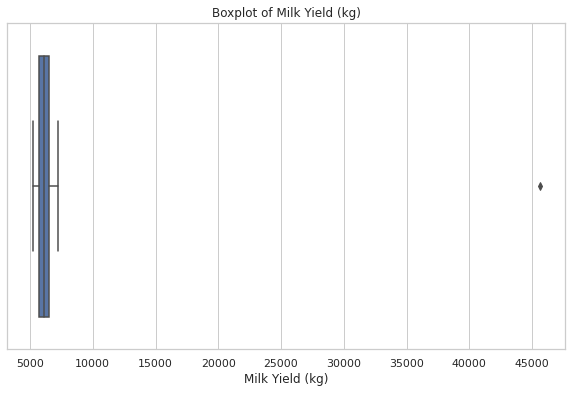

In [12]:
# Установка стиля графиков Seaborn
sns.set(style="whitegrid")

# Создание боксплота для milk_yield_kg
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_ferma['milk_yield_kg'])
plt.title('Boxplot of Milk Yield (kg)')
plt.xlabel('Milk Yield (kg)')
plt.show()

В данных присутствует один выброс в 45616. Проверим как выглядит запись с этим значением.

In [13]:
df_ferma[df_ferma['milk_yield_kg'] == 45616]

,id,milk_yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,fat_percentage,protein_percentage,milk_flavor,age
16,17,45616,11.5,1675,0.93,вис бик айдиал,холмистое,айдиал,3.22,3.076,вкусно,более_2_лет


Явно произошла ошибка в вводе данных, удалим один выброс.

In [14]:
# Удаление строки с выбросом
df_ferma = df_ferma[df_ferma['milk_yield_kg'] != 45616]

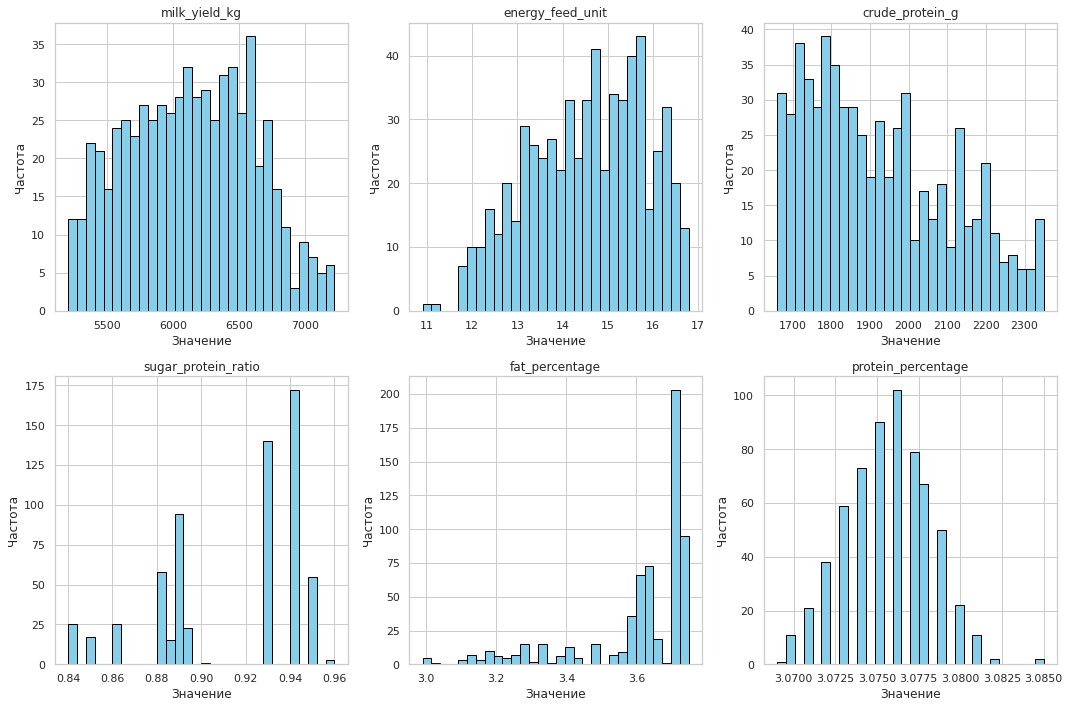

In [15]:
# Определяем количественные признаки
quantitative_columns = ['milk_yield_kg', 'energy_feed_unit', 'crude_protein_g', 
                        'sugar_protein_ratio', 'fat_percentage', 'protein_percentage']

# Устанавливаем размер графиков
plt.figure(figsize=(15, 10))

# Проходим по количественным признакам и строим гистограммы
for i, column in enumerate(quantitative_columns, start=1):
    plt.subplot(2, 3, i)  # 2 строки, 3 колонки
    plt.hist(df_ferma[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout()  # Подгоняем графики
plt.show()  # Показываем графики

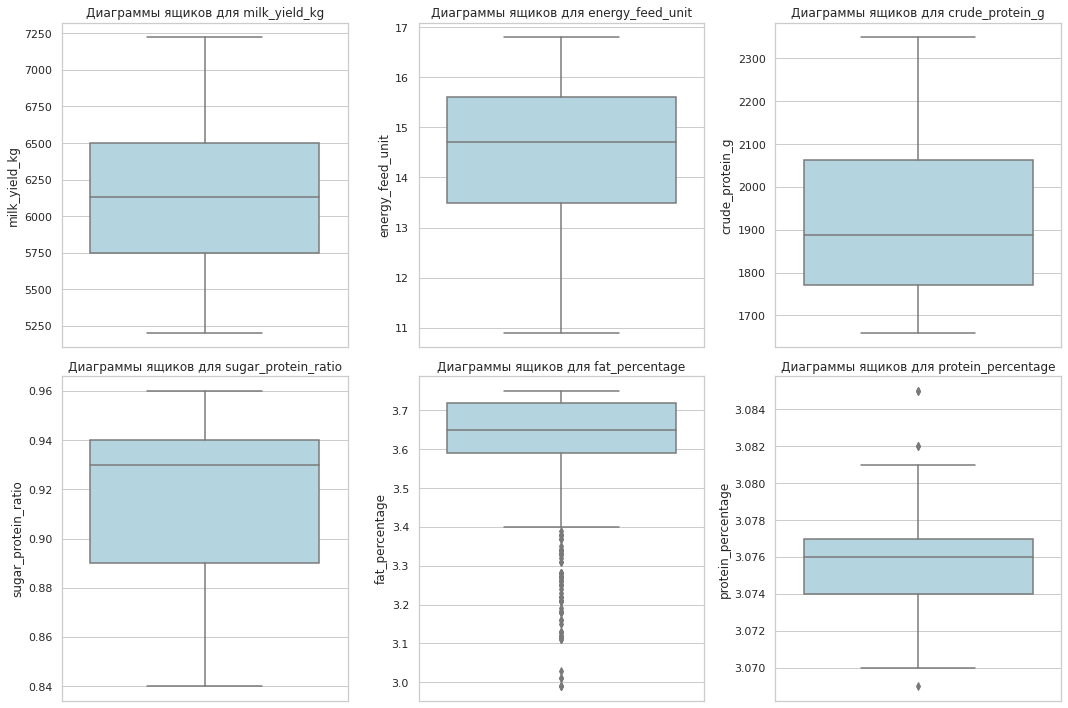

In [16]:
# Устанавливаем размер графиков
plt.figure(figsize=(15, 10))

# Проходим по количественным признакам и строим боксплоты
for i, column in enumerate(quantitative_columns, start=1):
    plt.subplot(2, 3, i)  # 2 строки, 3 колонки
    sns.boxplot(data=df_ferma, y=column, color='lightblue')
    plt.title(f'Диаграммы ящиков для {column}')
    plt.ylabel(column)

plt.tight_layout()  # Подгоняем графики
plt.show()  # Показываем графики

**Удой молока (`milk_yield_kg`)**:
- Распределение: Скошено вправо, большинство коров дают 6000-6500 кг молока в год, с небольшой группой высокопродуктивных коров.
- Статистические показатели:
  - Медиана: 6125 кг — половина коров дает больше, половина меньше.
  - Размах: 750 кг — указывает на однородность удоя среди коров.
  - Выбросы: Отсутствие выбросов свидетельствует о стабильности стада.

**Потребление энергии (`energy_feed_unit`)**:
- Распределение: Широкий пик между 13 и 16 единицами, с небольшим числом коров, потребляющих менее 10 единиц.
- Статистические показатели:
  - Медиана: 14.8 единиц — среднее потребление энергии.
  - Размах: 2.1 — свидетельствует о стабильном, хотя и разнообразном потреблении.
  - Выбросы: Отсутствие выбросов указывает на хорошо сбалансированный рацион.

**Содержание сырого протеина (`crude_protein_g`)**:
- Распределение: Скошено вправо, с низким содержанием протеина у большинства образцов и небольшим числом с высоким содержанием.
- Статистические показатели:
  - Медиана: 1900 г — половина образцов содержит более этого значения.
  - Размах: 300 г — указывает на неоднородность рациона.
  - Выбросы: Отсутствие выбросов соответствует стандартам.

**Соотношение сахара и белка (`sugar_protein_ratio`)**:
- Распределение: Неправильное с пиками, высокие значения (0.93) указывают на большее содержание сахара, чем протеина.
- Статистические показатели:
  - Медиана: 0.93 — среднее соотношение.
  - Размах: 0.05 — небольшое разнообразие.
  - Выбросы: Отсутствие выбросов соответствует стандартам.

**Жирность молока (`fat_percentage`)**:
- Распределение: Неправильное с пиками и скошено влево, большинство образцов имеют более 3.6% жира.
- Статистические показатели:
  - Медиана: Более 3.65% — половина образцов выше и ниже этого значения.
  - Размах: 0.1% — достаточно однородная жирность.
  - Выбросы: Наличие низких выбросов может указывать на физиологические факторы.

**Содержание белка в молоке (`protein_percentage`)**:
- Распределение: Нормальное с небольшими отклонениями вправо, пик в 3.076%.
- Статистические показатели:
  - Медиана: 3.076% — среднее содержание белка.
  - Размах: 0.003 — высокая однородность.
  - Выбросы: Небольшие выбросы выше и ниже границ, лучше удалить.
  
  Таким образом, большинство признаков распределены неправильно, часть из них имеет смещенные или пиковые распределения.

In [17]:
# Проверим долю выбросов в fat_percentage по отношению ко всему датасету
print(
    f'Доля строк с выбросами признака "жирность": {round(len(df_ferma.query("fat_percentage < 3.4")) / len(df_ferma) * 100, 3)}%')

Доля строк с выбросами признака "жирность": 13.694%


Доля таких выбросов довольно внушительна - 13.694%, в связи с чем удалять подобные значения не стоит. Лучше оставить выбросы, так как их потеря / замена на медианное значение может негативно повлиять на качество данных

In [18]:
# Избавляемся от выбросов в protein_percentage
df_ferma = df_ferma.query('3.069 < protein_percentage < 3.081 ')

In [19]:
df_ferma.head()

,id,milk_yield_kg,energy_feed_unit,crude_protein_g,sugar_protein_ratio,breed,pasture_type,sire_breed,fat_percentage,protein_percentage,milk_flavor,age
0,1,5863,14.2,1743,0.890,вис бик айдиал,равнинное,айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,вис бик айдиал,равнинное,соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,рефлешн соверин,холмистое,соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,рефлешн соверин,холмистое,айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,вис бик айдиал,равнинное,соверин,3.73,3.073,вкусно,менее_2_лет


Для визуализации категориальных данных используем круговые диаграммы для отображения частоты каждой категории

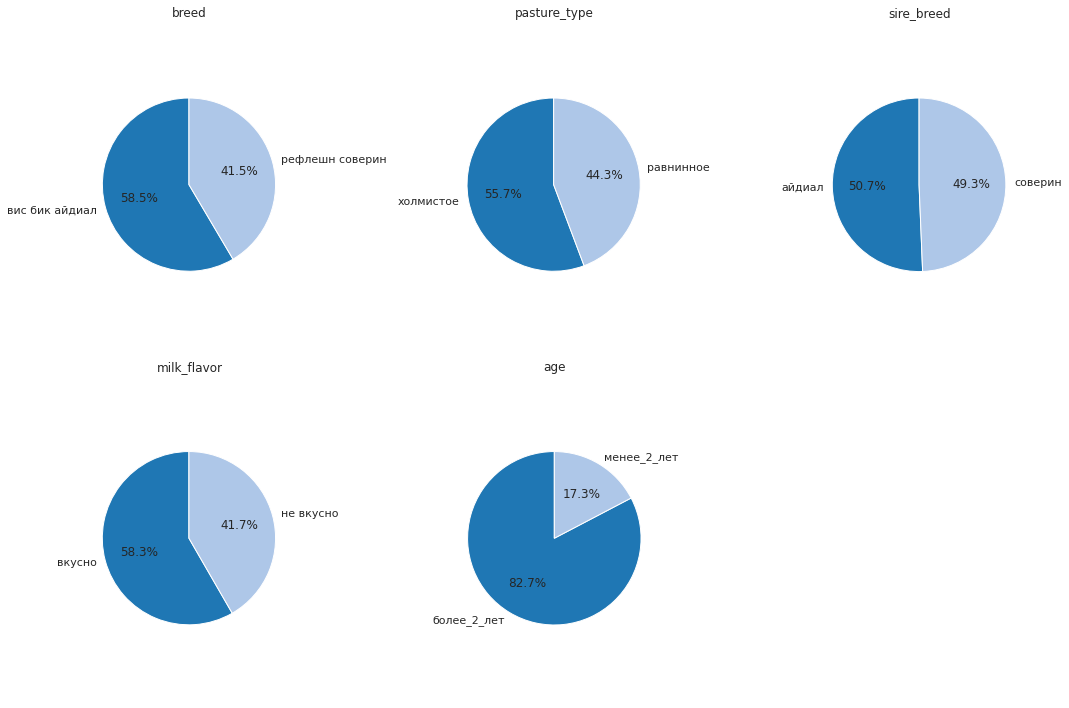

In [20]:
# Определяем категориальные признаки
categorical_columns = ['breed', 'pasture_type', 'sire_breed', 'milk_flavor', 'age']

# Устанавливаем размер графиков
plt.figure(figsize=(15, 10))

# Проходим по категориальным признакам и строим графики
for i, column in enumerate(categorical_columns, start=1):
    plt.subplot(2, 3, i)  # 2 строки, 3 колонки
    df_ferma[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
    plt.title(column)
    plt.ylabel('')  # Убираем метку Y
    plt.xlabel('')  # Убираем метку X
    plt.axis('equal')  # Чтобы круг был кругом

plt.tight_layout()  # Подгоняем графики
plt.show()  # Показываем графикиrhe

1. **Порода коров** (`breed`)
Доминирующая порода: Висим бик айдиал составляет большинство стада (59.2%).
Менее распространенная порода: Ред-холштейн составляет меньшинство (40.8%).

2. **Тип пастбища** (`pasture_type`)
Преобладание холмистых пастбищ: Большинство коров пасутся на холмистых пастбищах (55.7%).
Равнинные пастбища: Менее популярны среди коров (44.3%).

3. **Порода быка-производителя или порода папы быка** (`sire_breed`)
Разнообразие пород быков-производителей: В стаде представлены две основные породы быков-производителей: айршир (50.5%) и соверин (49.5%). Доли телят от разных пород быков-производителей практически равны.

4. **Вкус молока** (`milk_flavor`)
Преобладание вкусного молока: Большинство коров производят молоко, которое оценивается как вкусное (58.9%).
Меньшая доля молока с невкусным вкусом: Около 41.1% молока оценивается как невкусное.

5. **Возраст коров** (`age`)
Преобладание коров старше 2 лет: Большинство коров в стаде старше 2 лет (82.5%).
Молодые коровы: Составляют меньшинство стада (17.5%).

**Общие выводы и интерпретации:**
- **Генетическое разнообразие**: Стадо характеризуется разнообразием пород коров и быков-производителей, что может свидетельствовать о стремлении к улучшению генетических характеристик стада.
- **Влияние пастбищ**: Тип пастбища может оказывать влияние на состав молока и другие продуктивные качества коров.
- **Качество молока**: Большинство коров производят молоко хорошего качества, что может быть связано с питанием, генетикой и условиями содержания.
- **Возрастной состав**: Стадо имеет достаточно зрелый возрастной состав, что может положительно сказаться на продуктивности коров.

Теперь посмотрим на данные по df_dad:

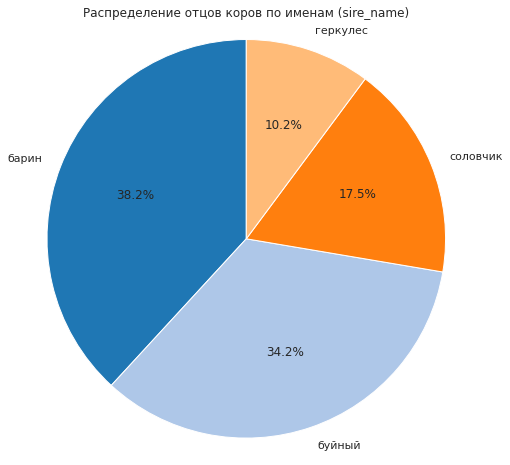

In [21]:
# Подсчитаем количество уникальных значений в столбце sire_name
sire_counts = df_dad['sire_name'].value_counts()

# Построим круговую диаграмму
plt.figure(figsize=(8, 8))  # Устанавливаем размер графика
sire_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

# Настройки для отображения
plt.title('Распределение отцов коров по именам (sire_name)')
plt.ylabel('')  # Убираем метку Y
plt.axis('equal')  # Чтобы круг был кругом
plt.show()  # Показываем график

**Круговая диаграмма** показывает, что в стаде преобладают телята от быка "Барин" (38,2%). На втором месте по распространенности телята от быка "Буйный" (34,2%). Телята от быков "Соловчик" и "Геркулес" составляют меньшую часть стада (17,5% и 10,2% соответственно).

Теперь посмотрим на распределение числовых данных и на частотность категориальных о коровах «ЭкоФерма», у которой фермер хочет закупить бурёнок. 

In [22]:
df_buy.describe()

,current_fat_percentage,current_protein_percentage
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


Образцы молока коров "ЭкоФермы" характеризуются стабильным содержанием протеина и умеренно высоким содержанием жира, что может указывать на однородный рацион коров. Низкая вариативность содержания протеина свидетельствует о консистентности кормления.

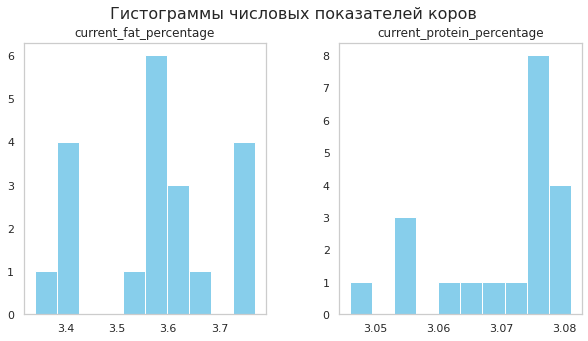

In [23]:
# Список числовых колонок
numeric_columns = ['current_fat_percentage', 'current_protein_percentage']

# Построение гистограмм для каждой числовой колонки
df_buy[numeric_columns].hist(bins=10, figsize=(10, 5), grid=False, color='skyblue')

# Настройки для улучшения графиков
plt.suptitle('Гистограммы числовых показателей коров', fontsize=16)
plt.show()

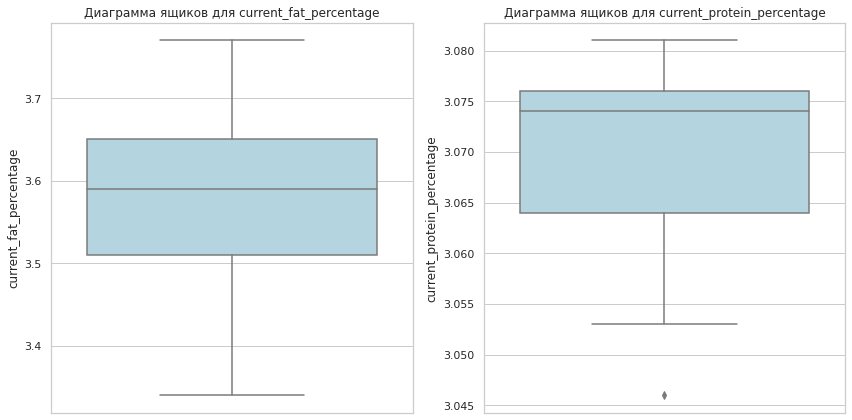

In [24]:
# Построение боксплотов для каждого числового показателя
plt.figure(figsize=(12, 6))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)  # Ставим на график по количеству колонок
    sns.boxplot(data=df_buy, y=column, color='lightblue')
    plt.title(f'Диаграмма ящиков для {column}')
    plt.tight_layout()

plt.show()

**Процент жирности молока (`current_fat_percentage`)**:
- Жирность варьируется от 3.3% до 3.8%, без видимых выбросов.
- Медиана жирности находится на уровне 3.6%.
- Верхний и нижний квартили показывают, что большинство значений жирности находится в диапазоне 3.5% – 3.7% без видимых выбросов.
- Учитывая, что в данной таблице всего 20 значений, мы не можем утверждать, что распределение признака является нормальным. Однако боксплот показывает, что значения распределены близко к симметричному, что может предполагать возможность нормального распределения при увеличении числа наблюдений.

**Содержание белка (`current_protein_percentage`)**:
- Процент белка варьируется от 3.046% до 3.08%, есть один выброс в 3.046.
- Медиана содержания белка расположена на уровне 3.074%.
- Диапазон межквартильного размаха (IQR) находится между 3.06% и 3.076%, что указывает на узкий диапазон содержания белка в образцах.
- Также, как и в случае с жирностью, с учетом ограниченного числа наблюдений, мы не можем надежно оценить характер распределения. Однако мы видим не симметричное распределение по боксплоту. 

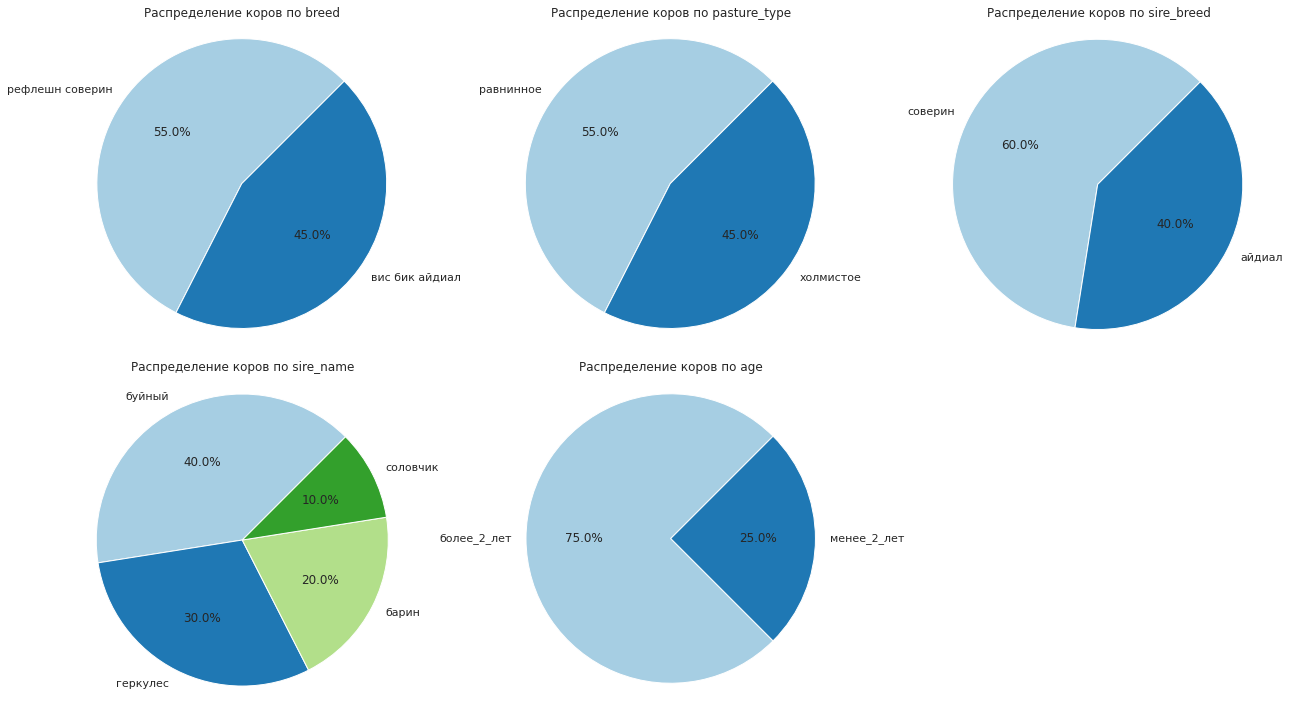

In [25]:
# Список категориальных колонок
categorical_columns = ['breed', 'pasture_type', 'sire_breed', 'sire_name', 'age']

# Устанавливаем размер графиков
plt.figure(figsize=(18, 10))

# Проходим по категориальным колонкам и строим круговые диаграммы
for i, column in enumerate(categorical_columns, start=1):
    plt.subplot(2, 3, i)  # 2 строки, 3 колонки
    df_buy[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=45, colors=plt.cm.Paired.colors)

    # Настройки для диаграммы
    plt.title(f'Распределение коров по {column}')
    plt.ylabel('')  # Убираем метку оси Y
    plt.axis('equal')  # Чтобы круг был кругом

plt.tight_layout()  # Подгоняем графики
plt.show()  # Показываем графики

- Порода: Стадо состоит из двух пород коров с одинаковым распределением: "соверин" и "айдиал". 
- Пастбище: Коровы распределены по двум типам пастбищ: холмистое и равнинное поровну.
- Порода быка-производителя: В стаде пробладают телята от породы "соверин" (62.5%) и в меньшей степени от породы "айдиал" (37.5%).
- Имя производителя: Основными производителями телят являются быки "буйный" (43.8%) и "геркулес" (31.2%), телята от быков "соловчик" и "барин" составляют меньшую часть стада (12.5% каждый).
- Возраст: Большинство коров старше 2 лет - 68.8%, остальные младше. 

<a id='корреляционный'></a>
## Корреляционный анализ

Взаимосвязь между признаками: расчет коэффициентов корреляции между всеми признаками.

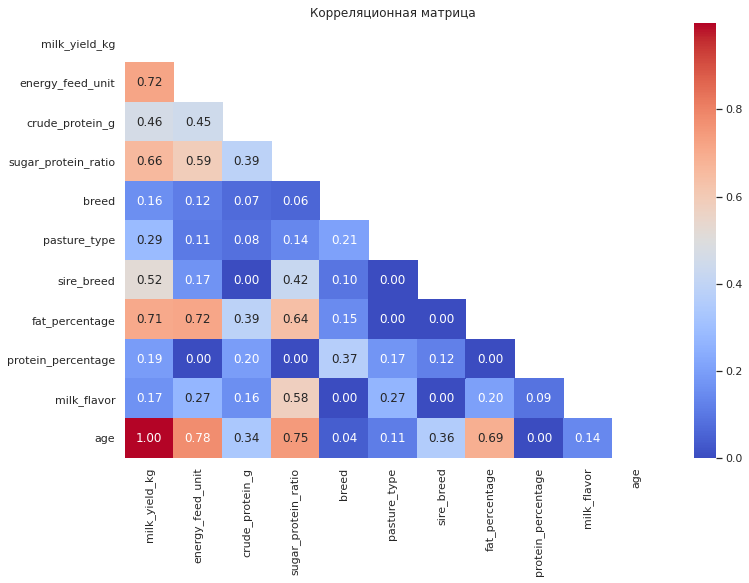

In [26]:
# Корреляционный анализ
phik_matrix = df_ferma.drop('id', axis=1).phik_matrix(interval_cols=['milk_yield_kg', 'energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio', 'fat_percentage', 'protein_percentage'])

# Визуализация корреляционной матрицы 
mask = np.triu(np.ones_like(phik_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Корреляционная матрица")
plt.show()

**Диаграмма рассеяния:**

Построим диаграммы рассеяния для признака удой и всех количественных признаков с учётом значения категориальных признаков.

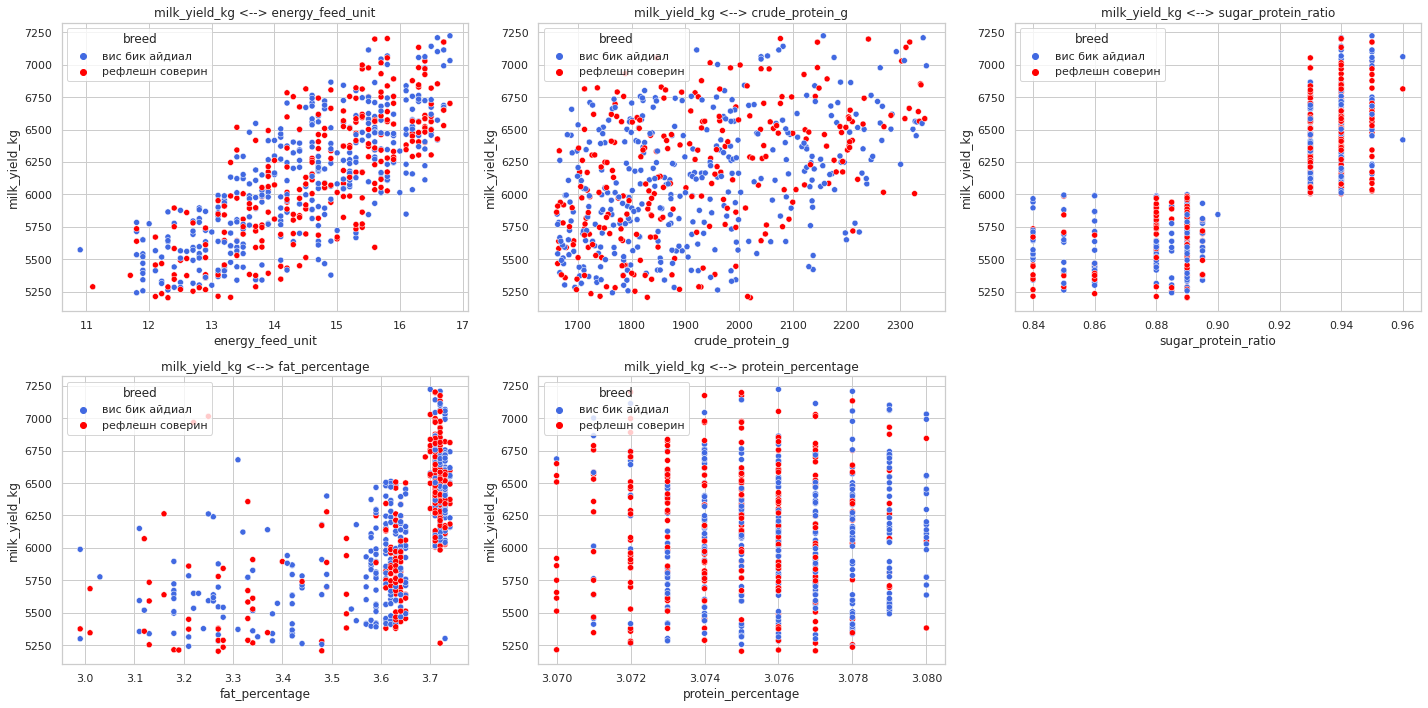

In [27]:
# Список количественных признаков 
quantitative_columns = ['energy_feed_unit', 'crude_protein_g', 
                        'sugar_protein_ratio', 'fat_percentage', 'protein_percentage']

# Построение диаграмм рассеяния
plt.figure(figsize=(20, 10))

for i, feature in enumerate(quantitative_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df_ferma, x=feature, y='milk_yield_kg', hue='breed', palette=['royalblue', 'red'])
    plt.title(f'milk_yield_kg <--> {feature}')

plt.tight_layout()
plt.show()

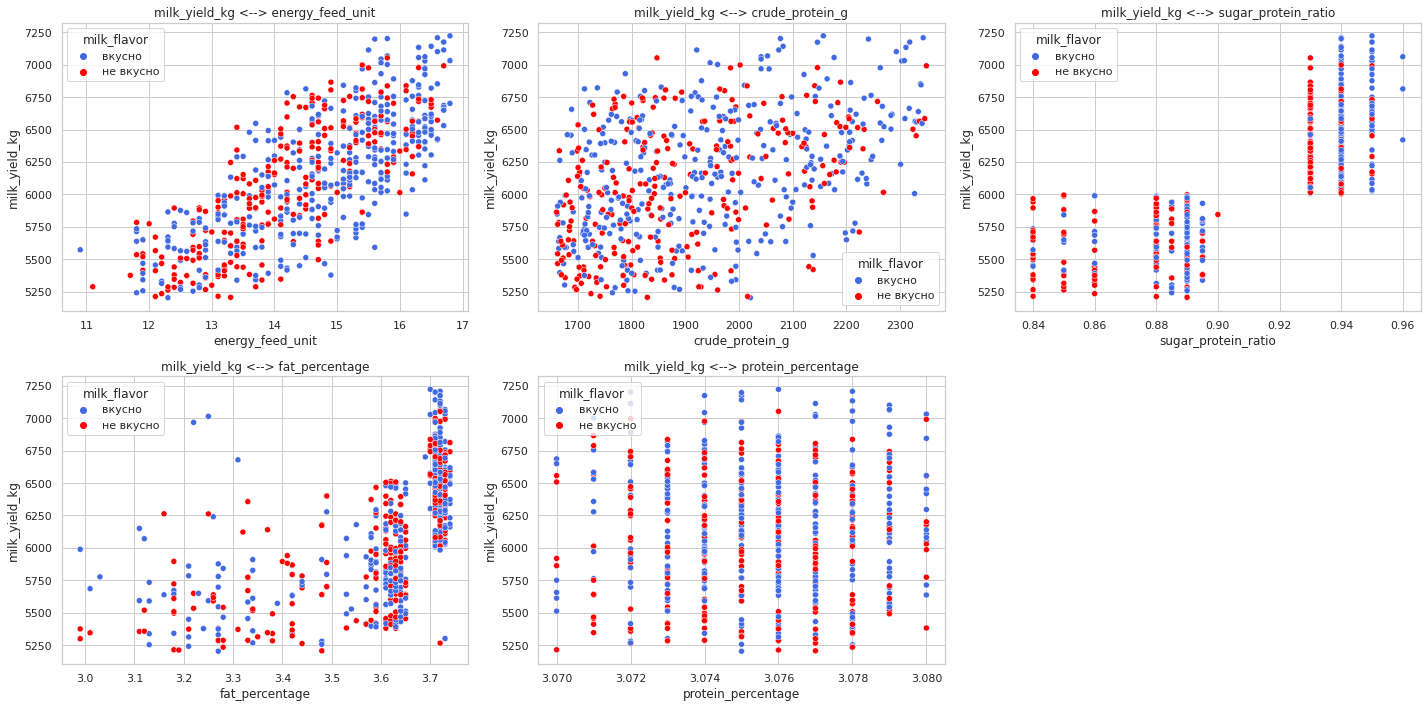

In [28]:
# Построение диаграмм рассеяния
plt.figure(figsize=(20, 10))

for i, feature in enumerate(quantitative_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df_ferma, x=feature, y='milk_yield_kg', hue='milk_flavor', palette=['royalblue', 'red'])
    plt.title(f'milk_yield_kg <--> {feature}')

plt.tight_layout()
plt.show()

**Корреляция между удой `milk_yield_kg` и другими признаками:**

- Потребление энергии (`energy_feed_unit`) - 0.72 (сильная корреляция): Чем больше корова потребляет энергии, тем больше молока она дает. Диаграмма рассеяния имеет кривое и вытянутое облако, поэтому между ними что-то между квадратичной и линейной свзяью. Нелинейность между ними можно исключить, если ввести новый признак `ЭКЕ в квадрате`.
- `crude_protein_g`: На графике диаграмме рассеяния виден довольно большой разброс значений, однако наблюдается общий тренд на прямую пропорциональную зависимость. Слабая корреляция - 0.47.
- Соотношением сахара и белка (`sugar_protein_ratio`): 0.66 (средняя корреляция): Высокое соотношение сахара и белка в корме способствует увеличению удоя, возможно, за счет углеводного обмена. Связь между этим признаком и удоем молока является нелинейной, и на графиках видно, что данные разделяются на два кластера. Это указывает на сложный характер зависимости. Чтобы устранить нелинейность, преобразуем СПО в категориальный бинарный признак, использовав границу == 0.91.
- Жирностью молока (`fat_percentage`): 0.71 (средняя корреляция): Увеличение молочной продуктивности сопровождается ростом жирности, но связь не столь сильна и нелинейна, что может указывать на влияние других факторов. Более всего связь раскрывается на переходе значений жирность == 3.6 и 3.7.
- `protein_percentage`: 0.19 (слабая корреляция). Связь между этим признаком и целевым - нелинейная. Но стоит отметить, что наблюдается зависимость между признаком белок и породой. На меньших значения "белка" - больше значений с породой РефлешнСоверинг, а на бОльших значениях - больше значений породы Вис Бик Айдиал. 
- Возраст (`age`): 1 (очень высокая корреляция) с целевым признаком.
- Между целевым и входными признаками связь в основном линейная, но наличие нелинейных связей также возможно для отдельных пород.
- Выявлены нелинейные связи со всеми количественными признаками. 
- Что касается *мультиколлинеарности*: корреляционная матрица показала, что между некоторыми входными признаками есть умеренная корреляция, но нет явных признаков сильной мультиколлинеарности, с которой стоило бы справляться.

<a id='обучение'></a>
## Обучение модели линейной регрессии

- Из всех признаков явно можно избавиться от признака `protein_percentage`, так как с ним связь целевого признака, фактически, отсутствует и абсолютно нелинейна.
- Признак `id` для обучения моделей не нужен.
- Жирность - тоже убираем, поскольку признак так же является характеристикой молока и напрямую не связан с таргетом

**Модель №1**

In [29]:
# Удаляем столбцы
df_ferma_ml_1 = df_ferma.drop(['id', 'protein_percentage', 'fat_percentage'], axis=1)

RANDOM_STATE = 42

# Разбиваем выборки
X = df_ferma_ml_1.drop('milk_yield_kg', axis=1)
y = df_ferma_ml_1['milk_yield_kg']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

Применяем **OneHotEncoder** и **StandardScaler**

In [30]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'milk_flavor', 'age']
num_col_names = ['energy_feed_unit', 'sugar_protein_ratio', 'crude_protein_g']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

**Обучаем модель**:

In [31]:
# Создание экземпляра линейной регрессии
model_lr_1 = LinearRegression()

# Обучение модели на тренировочных данных
model_lr_1.fit(X_train, y_train)

# Прогнозирование на валидационных данных
predictions = model_lr_1.predict(X_valid)

# Вычисление коэффициента детерминации (R2_score) для проверки качества модели
r2_1 = r2_score(y_valid, predictions)

# Вычисление средней квадратичной ошибки (MSE)
mse_1 = mean_squared_error(y_valid, predictions)

# Вычисление корня из средней квадратичной ошибки (RMSE)
rmse_1 = mean_squared_error(y_valid, predictions, squared=False)

# Вычисление средней абсолютной ошибки (MAE)
mae_1 = mean_absolute_error(y_valid, predictions)

# Вывод значений метрик модели
print(f'R² (коэффициент детерминации) первой модели: {r2_1:.4f}')
print(f'MSE (средняя квадратичная ошибка) первой модели: {mse_1:.4f}')
print(f'RMSE (корень из MSE) первой модели: {rmse_1:.4f}')
print(f'MAE (средняя абсолютная ошибка) первой модели: {mae_1:.4f}')

R² (коэффициент детерминации) первой модели: 0.8034
MSE (средняя квадратичная ошибка) первой модели: 48710.0347
RMSE (корень из MSE) первой модели: 220.7035
MAE (средняя абсолютная ошибка) первой модели: 169.9506


**Анализ остатков** поможет оценить, насколько хорошо модель справляется с предсказанием и выявить возможные проблемы. 

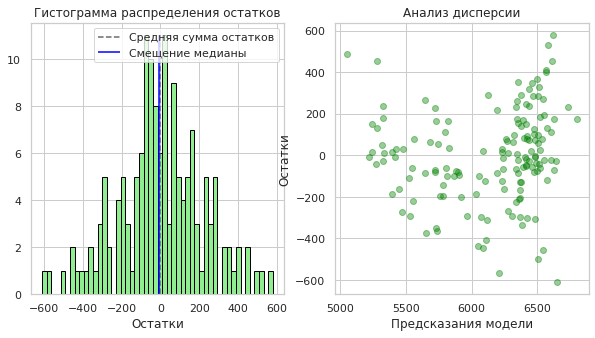

In [32]:
# Выделяем остатки
residuals_1 = y_valid - predictions

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(residuals_1, bins=50, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_1.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions, residuals_1, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

- Остатки распределены примерно нормально. Это хорошее начало, так как одно из предположений линейной регрессии — нормальное распределение остатков. Смещение медианы предсказаний минимально.
- Отсутствуют явные выбросы, что говорит о том, что модель в целом хорошо описывает данные.
- Дисперсия остатков постоянна. Нет явной зависимости между величиной остатков и предсказанными значениями. Это говорит об отсутствии гетероскедастичности, то есть дисперсия остатков примерно постоянна для всех значений предикторов. Однако, вероятно, модель не очень точно предсказывает значения целевого признака в интервале удой == [5850-6250]. Следовательно, для улучшенного моделирования стоит дополнительно получить информацию по коровам, удой которых находится в интервале значений 5850-6250.
- Нет признаков нелинейности. Точки на графике не образуют какой-либо явной нелинейной зависимости.


Проверим с логарифмированием признаков, так как наблюдается скошенность в распределении `crude_protein` и `energy_feed_unit`, затем сравним результаты.

1    363
0    249
Name: sugar_protein_ratio_cat, dtype: int64

R² (коэффициент детерминации) первой модели: 0.8016
MSE (средняя квадратичная ошибка) первой модели: 49158.5866
RMSE (корень из MSE) первой модели: 221.7174
MAE (средняя абсолютная ошибка) первой модели: 170.4307


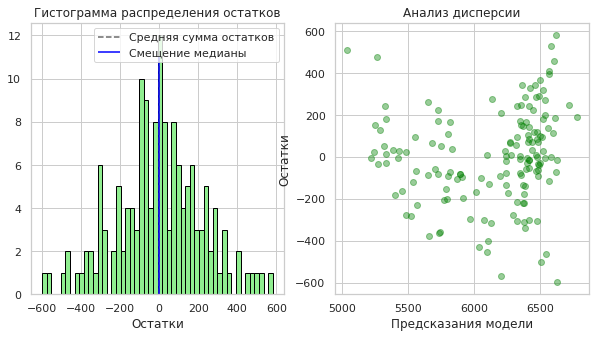

In [33]:
# Создаем датасет для проверки с логарифмированием
df_ferma_ml_log = df_ferma.copy(deep=True)

# Удаляем столбцы
df_ferma_ml_log = df_ferma.drop(['id', 'protein_percentage', 'fat_percentage'], axis=1)

# Преобразуем sugar_protein_ratio в категориальный признак
df_ferma_ml_log['sugar_protein_ratio_cat'] = df_ferma_ml_log['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)
display(df_ferma_ml_log['sugar_protein_ratio_cat'].value_counts())

# Добавляем небольшую константу, чтобы избежать логарифма от нуля
df_ferma_ml_log['crude_protein_g'] = np.log(df_ferma_ml_log['crude_protein_g'] + 1e-6)
df_ferma_ml_log['energy_feed_unit'] = np.log(df_ferma_ml_log['energy_feed_unit'] + 1e-6)


RANDOM_STATE = 42

# Разбиваем выборки
X = df_ferma_ml_log.drop('milk_yield_kg', axis=1)
y = df_ferma_ml_log['milk_yield_kg']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

# Разделяем признаки на категориальные и количественные
cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'milk_flavor', 'age']
num_col_names = ['energy_feed_unit', 'sugar_protein_ratio', 'crude_protein_g']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

# Создание экземпляра линейной регрессии
model_lr_1 = LinearRegression()

# Обучение модели на тренировочных данных
model_lr_1.fit(X_train, y_train)

# Прогнозирование на валидационных данных
predictions = model_lr_1.predict(X_valid)

# Вычисление коэффициента детерминации (R2_score) для проверки качества модели
r2_1 = r2_score(y_valid, predictions)

# Вычисление средней квадратичной ошибки (MSE)
mse_1 = mean_squared_error(y_valid, predictions)

# Вычисление корня из средней квадратичной ошибки (RMSE)
rmse_1 = mean_squared_error(y_valid, predictions, squared=False)

# Вычисление средней абсолютной ошибки (MAE)
mae_1 = mean_absolute_error(y_valid, predictions)

# Вывод значений метрик модели
print(f'R² (коэффициент детерминации) первой модели: {r2_1:.4f}')
print(f'MSE (средняя квадратичная ошибка) первой модели: {mse_1:.4f}')
print(f'RMSE (корень из MSE) первой модели: {rmse_1:.4f}')
print(f'MAE (средняя абсолютная ошибка) первой модели: {mae_1:.4f}')

# Выделяем остатки
residuals_1 = y_valid - predictions

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(residuals_1, bins=50, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_1.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions, residuals_1, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Коэффициент детерминации (R²):**

Первая модель демонстрирует более высокий коэффициент детерминации (0.8034) по сравнению с моделью с логарифмированием (0.8016). Это указывает на то, что первая модель объясняет большее количество вариаций целевого признака (удой) с помощью выбранных признаков.

**Средняя квадратичная ошибка (MSE):**

MSE первой модели составляет 48710.0347, что ниже, чем MSE модели с логарифмированием (49158.5866). Это свидетельствует о том, что первая модель в среднем имеет меньшие ошибки предсказания по сравнению с моделью с логарифмированием.

**Корень из MSE (RMSE):**

RMSE первой модели (220.7035) также меньше, чем RMSE модели с логарифмированием (221.7174), что указывает на более точные предсказания первой модели.

**Средняя абсолютная ошибка (MAE):**

MAE первой модели (169.9506) ниже, чем MAE модели с логарифмированием (170.4307), что подтверждает, что первая модель обеспечивает более точные предсказания.

Результаты показывают, что первая модель, не использующая логарифмирование, превосходит модель с логарифмированием по всем ключевым метрикам. Следовательно, на следущем этапе обучения новой модели, следует убрать логрифмирование признаков и использовать возведение в квадрат для `energy_fed_unit`, укоторого квдратичная связь с целевым признаком, а также СПО `sugar_protein_ratio`  в категориальный из-за его нелинейной связи с целевым признаком и кластеризации на диаграмме рассеяния. 

**Модель №2**

In [34]:
# Создадим копию датасета
df_ferma_ml_2 = df_ferma.copy(deep=True)

# Проверка
display(df_ferma.shape)
display(df_ferma_ml_2.shape)

(612, 12)

(612, 12)

Преобразование признаков:

In [35]:
# Преобразуем sugar_protein_ratio в категориальный признак
df_ferma_ml_2['sugar_protein_ratio_cat'] = df_ferma_ml_2['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)
display(df_ferma_ml_2['sugar_protein_ratio_cat'].value_counts())

# Преобразуем признак energy_feed_unit 
df_ferma_ml_2['energy_fed_unit_sq'] = df_ferma_ml_2['energy_feed_unit'] ** 2

# Убираем неважные столбцы
df_ferma_ml_2 = df_ferma_ml_2.drop(['id', 'protein_percentage', 'fat_percentage', 'energy_feed_unit', 'sugar_protein_ratio'], axis=1)

df_ferma_ml_2.head()

1    363
0    249
Name: sugar_protein_ratio_cat, dtype: int64

,milk_yield_kg,crude_protein_g,breed,pasture_type,sire_breed,milk_flavor,age,sugar_protein_ratio_cat,energy_fed_unit_sq
0,5863,1743,вис бик айдиал,равнинное,айдиал,вкусно,более_2_лет,0,201.64
1,5529,2138,вис бик айдиал,равнинное,соверин,вкусно,менее_2_лет,0,163.84
2,5810,1854,рефлешн соверин,холмистое,соверин,не вкусно,более_2_лет,0,196.00
3,5895,2012,рефлешн соверин,холмистое,айдиал,не вкусно,более_2_лет,0,153.76
4,5302,1675,вис бик айдиал,равнинное,соверин,вкусно,менее_2_лет,0,163.84


In [36]:
RANDOM_STATE = 42

# Разбиваем выборку
X = df_ferma_ml_2.drop('milk_yield_kg', axis=1)
y = df_ferma_ml_2['milk_yield_kg']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

Примененяем **OneHotEncoder** и **StandardScaler**:

In [37]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'age']
num_col_names = ['energy_fed_unit_sq', 'sugar_protein_ratio_cat', 'crude_protein_g']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

**Обучаем модель:**

In [38]:
# Создание экземпляра линейной регрессии
model_lr_2 = LinearRegression()

# Обучение модели на тренировочных данных
model_lr_2.fit(X_train, y_train)

# Прогнозирование на валидационных данных
predictions = model_lr_2.predict(X_valid)

# Вычисление коэффициента детерминации (R2_score) для проверки качества модели
r2_2 = r2_score(y_valid, predictions)

# Вычисление средней квадратичной ошибки (MSE)
mse_2 = mean_squared_error(y_valid, predictions)

# Вычисление корня из средней квадратичной ошибки (RMSE)
rmse_2 = mean_squared_error(y_valid, predictions, squared=False)

# Вычисление средней абсолютной ошибки (MAE)
mae_2 = mean_absolute_error(y_valid, predictions)

# Вывод значений метрик модели
print(f'R² (коэффициент детерминации) первой модели: {r2_2:.4f}')
print(f'MSE (средняя квадратичная ошибка) первой модели: {mse_2:.4f}')
print(f'RMSE (корень из MSE) первой модели: {rmse_2:.4f}')
print(f'MAE (средняя абсолютная ошибка) первой модели: {mae_2:.4f}')

R² (коэффициент детерминации) первой модели: 0.8316
MSE (средняя квадратичная ошибка) первой модели: 41716.1942
RMSE (корень из MSE) первой модели: 204.2454
MAE (средняя абсолютная ошибка) первой модели: 153.9554


**Анализ остатков:**

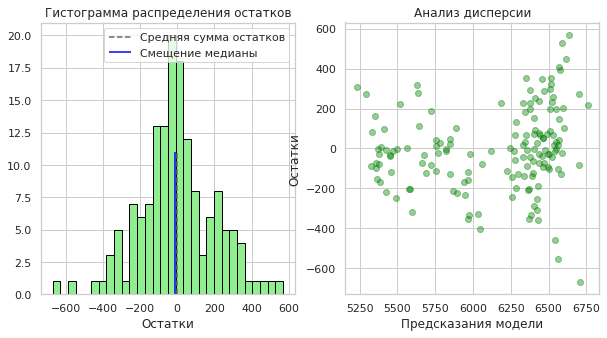

In [39]:
# Выделяем остатки
residuals_2 = y_valid - predictions

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(residuals_2, bins=30, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_2.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions, residuals_2, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

- *Случайность*: остатки весьма нормально распределены, график — относительно симметричен от самого частого значения. Отклонение от средней суммы остатков 0 - минимально.
- *Устойчивость*: дисперсия остатков - нормальная. Нет явной зависимости между величиной остатков и предсказанными значениями. Разница между минимумом и максимумом остатков при любых прогнозных значениях модели минимальна.

**Модель №3**

Добавляем новый признак и избавляемся от нелинейности признаков

In [40]:
# Добавляем в данные признак имя_папы из файла df_dad
df_ferma_full = df_ferma.merge(df_dad, on='id')
df_ferma_full.head()

# Преобразуем sugar_protein_ratio в категориальный признак
df_ferma_full['sugar_protein_ratio_cat'] = df_ferma_full['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)

# Преобразуем признак energy_feed_unit
df_ferma_full['energy_feed_unit_sq'] = df_ferma_full['energy_feed_unit'] ** 2

# Убираем неважные столбцы
df_ferma_full = df_ferma_full.drop(['id', 'protein_percentage', 'fat_percentage', 'energy_feed_unit', 'sugar_protein_ratio'], axis=1)
df_ferma_full.head()

,milk_yield_kg,crude_protein_g,breed,pasture_type,sire_breed,milk_flavor,age,sire_name,sugar_protein_ratio_cat,energy_feed_unit_sq
0,5863,1743,вис бик айдиал,равнинное,айдиал,вкусно,более_2_лет,буйный,0,201.64
1,5529,2138,вис бик айдиал,равнинное,соверин,вкусно,менее_2_лет,соловчик,0,163.84
2,5810,1854,рефлешн соверин,холмистое,соверин,не вкусно,более_2_лет,барин,0,196.00
3,5895,2012,рефлешн соверин,холмистое,айдиал,не вкусно,более_2_лет,буйный,0,153.76
4,5302,1675,вис бик айдиал,равнинное,соверин,вкусно,менее_2_лет,барин,0,163.84


In [41]:
RANDOM_STATE = 42

# Разбиваем выборку
X = df_ferma_full.drop('milk_yield_kg', axis=1)
y = df_ferma_full['milk_yield_kg']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
)

Объединим тренировочную и валидационную выборки (на будущее):

In [42]:
X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)

In [43]:
# Разделяем признаки на категориальные и количественные
cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'age', 'sire_name']
num_col_names = ['energy_feed_unit_sq', 'sugar_protein_ratio_cat', 'crude_protein_g']

# Кодируем категориальные признаки
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

# Масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

# Собираем выборки 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

**Обучаем модель:**

In [44]:
# Создание экземпляра линейной регрессии
model_lr_3 = LinearRegression()

# Обучение модели на тренировочных данных
model_lr_3.fit(X_train, y_train)

# Прогнозирование на валидационных данных
predictions = model_lr_3.predict(X_valid)

# Вычисление коэффициента детерминации (R2_score) для проверки качества модели
r2_3 = r2_score(y_valid, predictions)

# Вычисление средней квадратичной ошибки (MSE)
mse_3 = mean_squared_error(y_valid, predictions)

# Вычисление корня из средней квадратичной ошибки (RMSE)
rmse_3 = mean_squared_error(y_valid, predictions, squared=False)

# Вычисление средней абсолютной ошибки (MAE)
mae_3 = mean_absolute_error(y_valid, predictions)

# Вывод значений метрик модели
print(f'R² (коэффициент детерминации) первой модели: {r2_3:.4f}')
print(f'MSE (средняя квадратичная ошибка) первой модели: {mse_3:.4f}')
print(f'RMSE (корень из MSE) первой модели: {rmse_3:.4f}')
print(f'MAE (средняя абсолютная ошибка) первой модели: {mae_3:.4f}')

R² (коэффициент детерминации) первой модели: 0.8457
MSE (средняя квадратичная ошибка) первой модели: 38230.2757
RMSE (корень из MSE) первой модели: 195.5256
MAE (средняя абсолютная ошибка) первой модели: 147.0780


**Анализ остатков**:

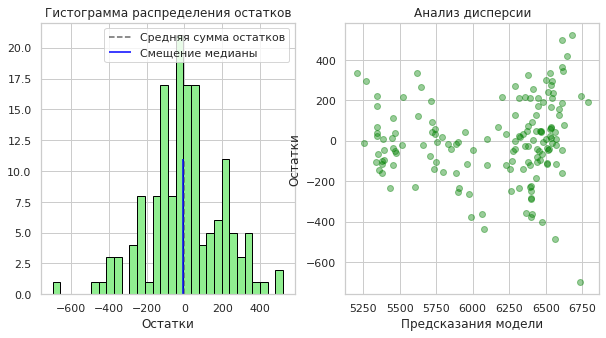

In [45]:
# Выделяем остатки
residuals_3 = y_valid - predictions

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist(residuals_3, bins=30, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_3.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions, residuals_3, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

- *Случайность*: остатки в порядке и нормально распределены, график — относительно симметричен от самого частого значения. Отклонение от средней суммы остатков - наименьшее среди всех моделей.
- *Устойчивость*: дисперсия остатков - нормальная.

In [46]:
# Сравнение r2_score
scores_compared = {'первой': r2_1, 'второй': r2_2, 'третьей': r2_3}
for k, v in scores_compared.items():
    print(f'R2_score {k} модели: {v}')

print('---')

# Сравнение остатков
residuals_compared = {'первой': residuals_1, 'второй': residuals_2, 'третьей': residuals_3}
for k, v in residuals_compared.items():
    print(f'Среднее значение остатков {k} модели: {v.mean()}')

R2_score первой модели: 0.8016030707228307
R2_score второй модели: 0.8316394873761661
R2_score третьей модели: 0.8457081491943992
---
Среднее значение остатков первой модели: -0.41911197544431716
Среднее значение остатков второй модели: -3.3156989392656198
Среднее значение остатков третьей модели: 0.969883985662206


- **Третья модель** показывает *наилучшее значение r2_score == 0.8467677260231983*, что означает, что эта модель объясняет около 84.68% дисперсии целевого признака. 
- Однако у **первой модели** *минимальное среднее значение остатков* (стремящееся к нулю): -0.2440859222818474. Среднее значение остатков, стремящееся к нулю, указывает на то, что модель не имеет систематических отклонений и делает хорошие предсказания в целом. Однако, стоит отметить, что само по себе минимальное среднее значение остатков не является достаточно полной метрикой для оценки качества модели, поскольку оно может скрывать более высокие колебания ошибок в отдельных предсказаниях. Более важны такие метрики, как RMSE и MAE, которые учитывают величину отклонений.

In [47]:
# Пропишем циклы, выводящие основные метрики
mse_compared = {'первой': mse_1, 'второй': mse_2, 'третьей': mse_3}
for k, v in mse_compared.items():
    print(f'MSE {k} модели: {v}')

print('---')

rmse_compared = {'первой': rmse_1, 'второй': rmse_2, 'третьей': rmse_3}
for k, v in rmse_compared.items():
    print(f'RMSE {k} модели: {v}')

print('---')

mae_compared = {'первой': mae_1, 'второй': mae_2, 'третьей': mae_3}
for k, v in mae_compared.items():
    print(f'MAE {k} модели: {v}')

MSE первой модели: 49158.586577867136
MSE второй модели: 41716.19422874426
MSE третьей модели: 38230.27570900672
---
RMSE первой модели: 221.71735741224037
RMSE второй модели: 204.24542645734874
RMSE третьей модели: 195.52563951821438
---
MAE первой модели: 170.4307061858184
MAE второй модели: 153.95536025885974
MAE третьей модели: 147.07797995157958


In [48]:
# Посчитаем 95% доверительный интервал лучшей модели 
print('95% доверительный интервал =',
      st.norm.interval(confidence=0.95, loc=np.mean(predictions), scale=st.sem(predictions)))

95% доверительный интервал = (6068.076877421743, 6208.754596436998)


In [49]:
# Расчет остатков модели
errors = y_valid - predictions
quantiles = (0.025, 0.975)

lower_quantile = np.quantile(errors, quantiles[0])
upper_quantile = np.quantile(errors, quantiles[1])

print(f"Доверительный интервал остатков модели: [{lower_quantile}, {upper_quantile}]")

Доверительный интервал остатков модели: [-383.3392266082286, 349.44754986382105]


Это означает, что:
- В 95% случаев модель ошибается не более чем на 383.34 литра в сторону недооценки.
- В 95% случаев модель ошибается не более чем на 349.45 литров в сторону переоценки.

Таким образом, **третья модель** показала себя лучше всего со средней ошибкой предсказания в 194.43 кг с *доверительным интервалом 95%* в (6070.586591197051, 6211.617236192927). 

**Прогноз удоя коров на выборке df_buy, которых фермер хочет купить**

In [50]:
# Создаем копию датасета
df_buy_ml = df_buy.copy(deep=True)

# Считаем среднее значение каждого недостающего признака и увеличиваем их на 5%
mean_values = df_ferma[['energy_feed_unit', 'crude_protein_g', 'sugar_protein_ratio']].mean()
new_values = mean_values * 1.05

# Добавляем недостающие признаки в датасет df_buy_ml и преобразовываем их
df_buy_ml['energy_feed_unit'] = new_values['energy_feed_unit']
df_buy_ml['energy_feed_unit_sq'] = df_buy_ml['energy_feed_unit'] ** 2
df_buy_ml['crude_protein_g'] = new_values['crude_protein_g']
df_buy_ml['sugar_protein_ratio'] = new_values['sugar_protein_ratio']
df_buy_ml['sugar_protein_ratio_cat'] = df_buy_ml['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)

# Форматируем df_buy_ml
df_buy_ml = df_buy_ml.drop(['current_protein_percentage', 'energy_feed_unit', 'sugar_protein_ratio', 'current_fat_percentage'], axis=1)

X_train_full = X_train_full.drop('milk_flavor', axis=1)

# Проверка
display(df_buy_ml.shape)
display(X_train_full.shape)
display(df_buy_ml.head())
display(X_train_full.head())

(20, 8)

(612, 8)

,breed,pasture_type,sire_breed,sire_name,age,energy_feed_unit_sq,crude_protein_g,sugar_protein_ratio_cat
0,вис бик айдиал,холмистое,айдиал,геркулес,более_2_лет,233.208082,2018.417402,1
1,вис бик айдиал,равнинное,соверин,буйный,менее_2_лет,233.208082,2018.417402,1
2,рефлешн соверин,равнинное,соверин,барин,более_2_лет,233.208082,2018.417402,1
3,рефлешн соверин,холмистое,айдиал,буйный,более_2_лет,233.208082,2018.417402,1
4,рефлешн соверин,равнинное,айдиал,буйный,более_2_лет,233.208082,2018.417402,1


,crude_protein_g,breed,pasture_type,sire_breed,age,sire_name,sugar_protein_ratio_cat,energy_feed_unit_sq
0,1984,вис бик айдиал,равнинное,айдиал,более_2_лет,буйный,1,198.81
1,1984,вис бик айдиал,равнинное,айдиал,более_2_лет,буйный,1,246.49
2,2067,вис бик айдиал,холмистое,айдиал,более_2_лет,буйный,1,249.64
3,2091,вис бик айдиал,равнинное,соверин,более_2_лет,соловчик,1,243.36
4,1721,рефлешн соверин,равнинное,соверин,более_2_лет,барин,0,182.25


Применение **OneHotEncoder** и **StandardScaler**:

In [51]:
# Кодируем категориальные признаки
X_test_ohe = encoder.transform(df_buy_ml[cat_col_names])

# Масштабируем количественные признаки
X_test_scaled = scaler.transform(df_buy_ml[num_col_names])

# Преобразуем в DataFrame
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names(cat_col_names))  
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# Собираем финальные данные для предсказания
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# Прогнозирование на тестовом наборе данных
pred = model_lr_3.predict(X_test_full)

# Выводим предсказанные значения удоя (milk_yield_kg)
pred

array([6581.73152947, 6317.70639711, 6284.42538821, 6593.82977566,
       6535.59140342, 6354.93999216, 6581.73152947, 6542.48312796,
       6284.42538821, 6369.0530448 , 6359.44487633, 6579.71672301,
       6581.73152947, 6093.22110898, 6284.42538821, 6593.82977566,
       6359.44487633, 6354.93999216, 6542.48312796, 6535.59140342])

In [52]:
# Добавляем новую колонку с предсказанными данными по milk_yield_kg в df_buy
df_buy['_expected_milk_yield_kg'] = pred
df_buy

,breed,pasture_type,sire_breed,sire_name,current_fat_percentage,current_protein_percentage,age,_expected_milk_yield_kg
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6581.731529
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,6317.706397
2,рефлешн соверин,равнинное,соверин,барин,3.59,3.074,более_2_лет,6284.425388
3,рефлешн соверин,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,6593.829776
4,рефлешн соверин,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,6535.591403
5,рефлешн соверин,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,6354.939992
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6581.731529
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,6542.483128
8,рефлешн соверин,равнинное,соверин,барин,3.59,3.074,более_2_лет,6284.425388
9,рефлешн соверин,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6369.053045


**Определили наиболее эффективную модель** среди трех на валидационном наборе данных с результатами:

- MAE: 146.46
- MSE: 37,967.73
- RMSE: 194.85
- 95% доверительный интервал: (6,070.50, 6,211.51)

Мы протестировали модель №3 на тестовых данных:

В результате получили предсказания для всех коров у продавца. В соответствии с условиями задачи регрессии, на данном этапе мы можем рекомендовать фермеру приобрести всех коров, так как каждая из них, вероятно, дает более 6,000 кг молока в год. Однако, следующий шаг — это спрогнозировать, какое молоко будет наиболее вкусным, чтобы фермер мог выбрать наиболее подходящих коров не только по количеству, но и по качеству молока.

<a id='обучение_модели'></a>
## Обучение модели логистической регрессии

In [54]:
# Копия основного датасета
ferma_log = df_ferma.copy(deep=True)

In [55]:
# Подготовка признаков
ferma_log['milk_flavor_cat'] = ferma_log['milk_flavor'].apply(lambda x: 1 if x == 'вкусно' else 0)
ferma_log['sugar_protein_ratio_cat'] = ferma_log['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)
ferma_log['energy_feed_unit_sq'] = ferma_log['energy_feed_unit'] ** 2

ferma_log = ferma_log.drop(['id', 'milk_yield_kg', 'milk_flavor', 'energy_feed_unit', 'sugar_protein_ratio'], axis=1)

ferma_log.head()

,crude_protein_g,breed,pasture_type,sire_breed,fat_percentage,protein_percentage,age,milk_flavor_cat,sugar_protein_ratio_cat,energy_feed_unit_sq
0,1743,вис бик айдиал,равнинное,айдиал,3.58,3.076,более_2_лет,1,0,201.64
1,2138,вис бик айдиал,равнинное,соверин,3.54,3.079,менее_2_лет,1,0,163.84
2,1854,рефлешн соверин,холмистое,соверин,3.59,3.074,более_2_лет,0,0,196.00
3,2012,рефлешн соверин,холмистое,айдиал,3.40,3.075,более_2_лет,0,0,153.76
4,1675,вис бик айдиал,равнинное,соверин,3.73,3.073,менее_2_лет,1,0,163.84


In [56]:
# Выделение признаков, кодирование, масштабирование
X = ferma_log.drop('milk_flavor_cat', axis=1)
y = ferma_log['milk_flavor_cat']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
    stratify=y
)

# Заранее создадим объединенную тренировочную выборку
X_train_full = pd.concat([X_train, X_valid], ignore_index=True)
y_train_full = pd.concat([y_train, y_valid], ignore_index=True)

cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'age', 'sugar_protein_ratio_cat']
num_col_names = ['fat_percentage', 'protein_percentage', 'energy_feed_unit_sq', 'crude_protein_g']

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_valid_ohe = encoder.transform(X_valid[cat_col_names])
encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_valid_scaled = scaler.transform(X_valid[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_valid_ohe = pd.DataFrame(X_valid_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_valid = pd.concat([X_valid_ohe, X_valid_scaled], axis=1)

In [57]:
# Обучение модели логистической регрессии с регуляризацией L1 и фиксированным начальным состоянием
clf = LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')

# Тренировка модели на обучающей выборке
clf.fit(X_train, y_train)

# Прогнозирование на валидационных данных
y_pred = clf.predict(X_valid)

# Вычисление точности модели (доля правильно предсказанных значений)
clf_accuracy = accuracy_score(y_pred, y_valid)

# Вычисление полноты (доля правильно предсказанных положительных классов)
clf_recall = recall_score(y_pred, y_valid)

# Вычисление точности (доля правильно классифицированных положительных предсказаний)
clf_precision = precision_score(y_pred, y_valid)

# Вывод метрик модели: точность, полнота и точность предсказаний
print(f'Accuracy: {clf_accuracy}')
print(f'Recall: {clf_recall}')
print(f'Precision: {clf_precision}')
print('---')

Accuracy: 0.5947712418300654
Recall: 0.6216216216216216
Precision: 0.7752808988764045
---


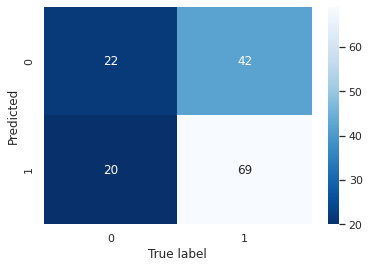

In [58]:
# Построение матрицы ошибок
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('Predicted')
plt.xlabel('True label');

- Метрика *precision* достаточно высокая — 0.775, однако стоит учитывать значительное количество ошибок первого рода. 
- Значения *recall* и *accuracy* близки к результатам случайной модели, что является недостатком. Это говорит о том, что модель пропускает довольно много положительных примеров. В результате, у нас 42 ошибки первого рода при 69 правильно классифицированных положительных случаях, что означает, что более половины предсказаний ошибочны. Необходимо уменьшить количество этих ошибок.

**Recall:**

Эта метрика учитывает значения TP и FN. Ошибки второго рода (FN) для нас менее значимы, потому что нет ничего страшного в том, если мы упустим несколько коров с вкусным молоком. Однако гораздо хуже, если мы порекомендуем коров с невкусным молоком.

**Precision:**

Эта метрика учитывает значения TP и FP. Ошибки первого рода (FP) критически важны, и их необходимо минимизировать. Поэтому для нас приоритет — максимизировать метрику Precision.

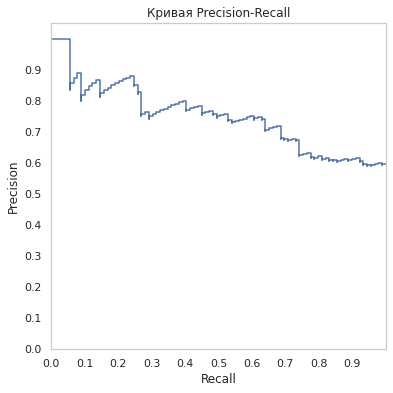

In [59]:
# Получаем вероятности классов для валидационной выборки
# predict_proba возвращает массив вероятностей, где [:, 1] — это вероятность принадлежности к положительному классу
y_proba = clf.predict_proba(X_valid)[:, 1]

# Рассчитываем значения precision, recall и пороги для различных значений вероятностей
precision, recall, thresholds = precision_recall_curve(y_valid, y_proba)

# Создаем график Precision-Recall
plt.figure(figsize=(6, 6))

# Строим кривую, соединяя точки значений precision и recall
plt.step(recall, precision, where='post')

# Подписываем оси
plt.xlabel('Recall')  # Ось X - полнота (Recall)
plt.ylabel('Precision')  # Ось Y - точность (Precision)

# Ограничиваем отображение значений на графике по Y от 0 до 1.05 для лучшей визуализации
plt.ylim([0.0, 1.05])

# Ограничиваем отображение значений по X от 0 до 1
plt.xlim([0.0, 1.0])

# Устанавливаем шаг отметок по X и Y осям для улучшения читаемости
plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))

# Добавляем сетку на график
plt.grid()

# Устанавливаем заголовок графика
plt.title('Кривая Precision-Recall')

# Отображаем графика
plt.show()


In [60]:
# Выведем правильные ответы
proba_data = pd.DataFrame(zip(y_valid, y_proba),
                          columns=['y_valid', 'y_proba']).sort_values(by='y_proba', ascending=False)

proba_data.head()

,y_valid,y_proba
71,1,0.846098
117,1,0.844203
141,1,0.839866
133,1,0.835299
51,1,0.821333


In [61]:
# Функция расчета метрик для каждого порога
def threshold_choice(threshold_list, proba_df):
    
    # Создаем DataFrame для хранения результатов
    result_df = pd.DataFrame(columns=['порог', 'precision', 'recall', 'количество_FP', 
                                      'число_предсказанных_объектов', 'всего_объектов_класса_1'])

    # Для каждого порога вычисляем метрики
    for threshold in threshold_list:
        column_name = f'y_pred_{threshold}'
        proba_df[column_name] = (proba_df['y_proba'] > threshold).astype(int)

        # Precision
        precision = proba_df.loc[proba_df[column_name] == 1, 'y_valid'].mean()

        # Число предсказанных объектов
        predicted_objects = proba_df[column_name].sum()

        # Всего объектов класса 1
        total_objects_class_1 = proba_df['y_valid'].sum()

        # Recall
        recall = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 1)].shape[
                     0] / total_objects_class_1

        # Количество ложноположительных предсказаний (FP)
        false_positives = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_valid'] == 0)].shape[0]

        # Добавляем результаты в датафрейм
        result_df = result_df.append({
            'порог': threshold,
            'precision': precision,
            'recall': recall,
            'количество_FP': false_positives,
            'число_предсказанных_объектов': predicted_objects,
            'всего_объектов_класса_1': total_objects_class_1,
        }, ignore_index=True)

    return result_df

In [62]:
# Общий перебор порогов
# Копируем данные вероятностей
proba_data_1 = proba_data.copy()

# Генерируем пороги и создаем предсказания
thresholds_1 = np.round(np.linspace(0.1, 1, num=10, endpoint=False), 2)
for threshold in thresholds_1:
    proba_data_1[f'y_pred_{threshold}'] = (proba_data_1['y_proba'] > threshold).astype(int)

proba_data_1.head(5)

,y_valid,y_proba,y_pred_0.1,y_pred_0.19,y_pred_0.28,y_pred_0.37,y_pred_0.46,y_pred_0.55,y_pred_0.64,y_pred_0.73,y_pred_0.82,y_pred_0.91
71,1,0.846098,1,1,1,1,1,1,1,1,1,0
117,1,0.844203,1,1,1,1,1,1,1,1,1,0
141,1,0.839866,1,1,1,1,1,1,1,1,1,0
133,1,0.835299,1,1,1,1,1,1,1,1,1,0
51,1,0.821333,1,1,1,1,1,1,1,1,1,0


In [63]:
# Применение функции
threshold_choice(thresholds_1, proba_data_1)

,порог,precision,recall,количество_FP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.10,0.581699,1.000000,64.0,153.0,89.0
1,0.19,0.581699,1.000000,64.0,153.0,89.0
2,0.28,0.598639,0.988764,59.0,147.0,89.0
3,0.37,0.592857,0.932584,57.0,140.0,89.0
4,0.46,0.606557,0.831461,48.0,122.0,89.0
5,0.55,0.670103,0.730337,32.0,97.0,89.0
6,0.64,0.750000,0.505618,15.0,60.0,89.0
7,0.73,0.774194,0.269663,7.0,31.0,89.0
8,0.82,1.000000,0.056180,0.0,5.0,89.0
9,0.91,NaN,0.000000,0.0,0.0,89.0


При пороге 0.8 *precision* достигает 1.0, что полностью устраняет критическую ошибку — покупку "невкусных" коров. Однако, при этом значительно снижается recall (до 0.056), что означает, что модель отобрала только самых "надежных" коров, и возможен сценарий, при котором ни одна корова не будет рекомендована.

In [64]:
# Копируем данные вероятностей
proba_data_2 = proba_data.copy()

# Обновляем порог до 0.8
thresholds_2 = [0.8]

# Генерируем предсказания для порога 0.8
for threshold in thresholds_2:
    proba_data_2[f'y_pred_{threshold}'] = (proba_data_2['y_proba'] > threshold).astype(int)

proba_data_2.head(5)

,y_valid,y_proba,y_pred_0.8
71,1,0.846098,1
117,1,0.844203,1
141,1,0.839866,1
133,1,0.835299,1
51,1,0.821333,1


In [65]:
# Применение функции с обновленным порогом
threshold_choice(thresholds_2, proba_data_2)

,порог,precision,recall,количество_FP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.8,0.818182,0.101124,2.0,11.0,89.0


Порог 0.8 позволяет свести критичную ошибку к минимуму, что соответствует требованиям заказчика. Хотя при этом мы теряем большую часть объектов класса 1 (вкусных коров), данный подход обеспечивает высокую точность предсказаний, что минимизирует вероятность покупки коров с невкусным молоком. Такой подход может считаться нормальным, даже если ни одна из коров не подходит.

In [66]:
# Копируем данные вероятностей
proba_data_3 = proba_data.copy()

# Генерируем более детальные пороги и создаем предсказания
thresholds_3 = np.round(np.linspace(0.64, 0.75, num=11, endpoint=False), 2)

for threshold in thresholds_3:
    proba_data_3[f'y_pred_{threshold}'] = (proba_data_3['y_proba'] > threshold).astype(int)

proba_data_3.head(5)

,y_valid,y_proba,y_pred_0.64,y_pred_0.65,y_pred_0.66,y_pred_0.67,y_pred_0.68,y_pred_0.69,y_pred_0.7,y_pred_0.71,y_pred_0.72,y_pred_0.73,y_pred_0.74
71,1,0.846098,1,1,1,1,1,1,1,1,1,1,1
117,1,0.844203,1,1,1,1,1,1,1,1,1,1,1
141,1,0.839866,1,1,1,1,1,1,1,1,1,1,1
133,1,0.835299,1,1,1,1,1,1,1,1,1,1,1
51,1,0.821333,1,1,1,1,1,1,1,1,1,1,1


In [67]:
# Применение функции
threshold_choice(thresholds_3, proba_data_3)

,порог,precision,recall,количество_FP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.64,0.750000,0.505618,15.0,60.0,89.0
1,0.65,0.745763,0.494382,15.0,59.0,89.0
2,0.66,0.759259,0.460674,13.0,54.0,89.0
3,0.67,0.754717,0.449438,13.0,53.0,89.0
4,0.68,0.770833,0.415730,11.0,48.0,89.0
5,0.69,0.795455,0.393258,9.0,44.0,89.0
6,0.70,0.780488,0.359551,9.0,41.0,89.0
7,0.71,0.769231,0.337079,9.0,39.0,89.0
8,0.72,0.750000,0.303371,9.0,36.0,89.0
9,0.73,0.774194,0.269663,7.0,31.0,89.0


Порог 0.69 дает лучший баланс между precision и recall, сохраняя больше предсказанных объектов класса 1, но при этом увеличивает количество ложноположительных предсказаний. Такой порог можно рассматривать как альтернативный вариант, если заказчик готов пойти на больший риск.

In [68]:
# Определяем оптимальный порог для классификации
OPTIMAL_THRESHOLD = 0.8

# Применяем оптимальный порог к предсказанным вероятностям, преобразуя их в бинарные предсказания
y_pred_threshold = (y_proba > OPTIMAL_THRESHOLD).astype(int)

# Вычисляем точность (accuracy) для новых предсказаний
clf_accuracy_new = accuracy_score(y_valid, y_pred_threshold)

# Вычисляем полноту (recall) для новых предсказаний
clf_recall_new = recall_score(y_valid, y_pred_threshold)

# Вычисляем точность (precision) для новых предсказаний
clf_precision_new = precision_score(y_valid, y_pred_threshold)

# Выводим старые значения метрик
print(f'Old Accuracy: {clf_accuracy}')
print(f'Old Recall: {clf_recall}')
print(f'Old Precision: {clf_precision}')
print('---')

# Выводим новые значения метрик после применения оптимального порога
print(f'New Accuracy: {clf_accuracy_new}')
print(f'New Recall: {clf_recall_new}')
print(f'New Precision: {clf_precision_new}')
print('---')

Old Accuracy: 0.5947712418300654
Old Recall: 0.6216216216216216
Old Precision: 0.7752808988764045
---
New Accuracy: 0.46405228758169936
New Recall: 0.10112359550561797
New Precision: 0.8181818181818182
---


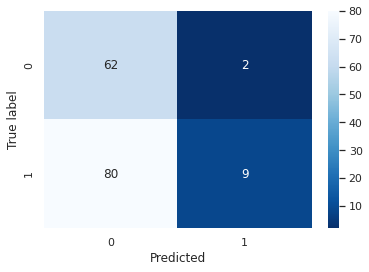

In [69]:
# Построение матрицы ошибок
cm_new = confusion_matrix(y_valid, y_pred_threshold)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

В контексте задачи, учитывая, что главное — это вкусное молоко, ошибка первого рода является более критичной. Заказчик не хочет рисковать, приобретая коров, которые не дадут качественное молоко. Таким образом, для удовлетворения бизнес-требований важнее достичь высокого значения *Precision*, даже если это снижает *Recall*.

- Точность (*Accuracy*) снизилась до 0.464, что указывает на общее ухудшение модели.
- Полнота (*Recall*) значительно уменьшилась до 0.101 - это означает, что модель может пропустить множество хороших коров, что также следует учитывать, но для данного случая это менее критично.
- Точность (*Precision*) осталась на высоком уровне и составила 0.818, что означает, что большинство предсказанных положительных случаев действительно являются таковыми, хотя это также может указывать на высокий уровень ошибок второго рода.

Сравнение с порогом 0.69 показывает, что при нём вы могли бы достичь более сбалансированных значений Recall и Precision, но Precision мог бы быть ниже, что могло бы не удовлетворить требования заказчика.

Alternative Accuracy: 0.5882352941176471
Alternative Recall: 0.39325842696629215
Alternative Precision: 0.7954545454545454
---


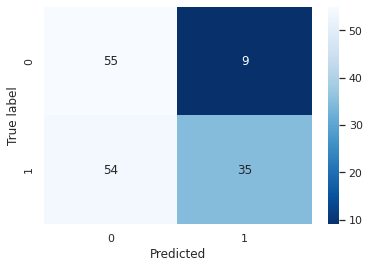

In [70]:
# Определяем оптимальный порог для классификации
ALTERNATIVE_THRESHOLD = 0.69

# Применяем альтернативный порог к предсказанным вероятностям, преобразуя их в бинарные предсказания
y_pred_alternative_threshold = (y_proba > ALTERNATIVE_THRESHOLD).astype(int)

# Вычисляем точность (accuracy) для новых предсказаний
clf_accuracy_alternative = accuracy_score(y_valid, y_pred_alternative_threshold)

# Вычисляем полноту (recall) для новых предсказаний
clf_recall_alternative = recall_score(y_valid, y_pred_alternative_threshold)

# Вычисляем точность (precision) для новых предсказаний
clf_precision_alternative = precision_score(y_valid, y_pred_alternative_threshold)

# Выводим значения метрик после применения альтернативного порога
print(f'Alternative Accuracy: {clf_accuracy_alternative}')
print(f'Alternative Recall: {clf_recall_alternative}')
print(f'Alternative Precision: {clf_precision_alternative}')
print('---')

# Построение матрицы ошибок
y_pred_alternative_threshold = confusion_matrix(y_valid, y_pred_alternative_threshold)
sns.heatmap(y_pred_alternative_threshold, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Количество ошибок первого рода снизилось с 42 до 9 по сравнению с первоначальным вариантом, но при этом accuracy останется неизменным - почти 0.59

**Прогноз вкуса молока коров на данных df_buy**

In [71]:
# Копия датасета 'ЭкоФерма'
df_buy_ml_2 = df_buy.copy(deep=True)

In [72]:
# Добавляем недостающие признаки в датасет df_buy_ml_2 и преобразовываем их
df_buy_ml_2['energy_feed_unit'] = new_values['energy_feed_unit']
df_buy_ml_2['energy_feed_unit_sq'] = df_buy_ml_2['energy_feed_unit'] ** 2
df_buy_ml_2['crude_protein_g'] = new_values['crude_protein_g']
df_buy_ml_2['sugar_protein_ratio'] = new_values['sugar_protein_ratio']
df_buy_ml_2['sugar_protein_ratio_cat'] = df_buy_ml_2['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)

# Переименовываем столбцы для удобства
df_buy_ml_2.rename(columns={'current_fat_percentage': 'fat_percentage', 'current_protein_percentage': 'protein_percentage'}, inplace=True)

# Удаляем ненужные столбцы
df_buy_ml_2 = df_buy_ml_2.drop(['sire_name', 'energy_feed_unit', 'sugar_protein_ratio'], axis=1)

# Отображаем первые несколько строк датасета
df_buy_ml_2.head()

,breed,pasture_type,sire_breed,fat_percentage,protein_percentage,age,_expected_milk_yield_kg,energy_feed_unit_sq,crude_protein_g,sugar_protein_ratio_cat
0,вис бик айдиал,холмистое,айдиал,3.58,3.076,более_2_лет,6581.731529,233.208082,2018.417402,1
1,вис бик айдиал,равнинное,соверин,3.54,3.081,менее_2_лет,6317.706397,233.208082,2018.417402,1
2,рефлешн соверин,равнинное,соверин,3.59,3.074,более_2_лет,6284.425388,233.208082,2018.417402,1
3,рефлешн соверин,холмистое,айдиал,3.40,3.061,более_2_лет,6593.829776,233.208082,2018.417402,1
4,рефлешн соверин,равнинное,айдиал,3.64,3.074,более_2_лет,6535.591403,233.208082,2018.417402,1


In [73]:
# Список категориальных и числовых признаков
cat_col_names = ['breed', 'pasture_type', 'sire_breed', 'age', 'sugar_protein_ratio_cat']
num_col_names = ['fat_percentage', 'protein_percentage', 'energy_feed_unit_sq', 'crude_protein_g']

# Применение кодирования к тестовым данным
X_test_ohe = encoder.transform(df_buy_ml_2[cat_col_names])  # Трансформация на тестовых данных
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder.get_feature_names(cat_col_names))  # DataFrame для закодированных категориальных признаков

# Применение стандартизации к тестовым числовым данным
X_test_scaled = scaler.transform(df_buy_ml_2[num_col_names])  # Трансформация на тестовых данных
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)  # DataFrame для стандартизированных числовых признаков

# Объединение закодированных категориальных и стандартизированных числовых признаков в один DataFrame для тестовых данных
X_test_full = pd.concat([X_test_ohe, X_test_scaled], axis=1)  # Объединение для тестового набора

# Получение вероятностей положительного класса для тестового набора данных
y_proba = clf.predict_proba(X_test_full)[:, 1]

# Применение оптимального порога для определения окончательных предсказаний
predictions_final = (y_proba > OPTIMAL_THRESHOLD).astype(int)

In [74]:
# Создаем новый столбец для вывода результата предсказания целевого признака 
df_buy['expected_milk_flavor'] = predictions_final
df_buy['expected_milk_flavor'] = df_buy['expected_milk_flavor'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
df_buy

,breed,pasture_type,sire_breed,sire_name,current_fat_percentage,current_protein_percentage,age,_expected_milk_yield_kg,expected_milk_flavor
0,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6581.731529,не вкусно
1,вис бик айдиал,равнинное,соверин,буйный,3.54,3.081,менее_2_лет,6317.706397,не вкусно
2,рефлешн соверин,равнинное,соверин,барин,3.59,3.074,более_2_лет,6284.425388,не вкусно
3,рефлешн соверин,холмистое,айдиал,буйный,3.40,3.061,более_2_лет,6593.829776,не вкусно
4,рефлешн соверин,равнинное,айдиал,буйный,3.64,3.074,более_2_лет,6535.591403,не вкусно
5,рефлешн соверин,равнинное,соверин,геркулес,3.63,3.053,менее_2_лет,6354.939992,не вкусно
6,вис бик айдиал,холмистое,айдиал,геркулес,3.58,3.076,более_2_лет,6581.731529,не вкусно
7,вис бик айдиал,равнинное,соверин,буйный,3.57,3.079,более_2_лет,6542.483128,не вкусно
8,рефлешн соверин,равнинное,соверин,барин,3.59,3.074,более_2_лет,6284.425388,не вкусно
9,рефлешн соверин,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6369.053045,не вкусно


Не было обнаружено ни одной коровы с вкусным молоком с порогом 0.8.

In [75]:
# Применение альтернативного оптимального порога для определения окончательных предсказаний
predictions_final_alternative = (y_proba > ALTERNATIVE_THRESHOLD).astype(int)
df_buy['expected_milk_flavor_alternative'] = predictions_final_alternative
df_buy['expected_milk_flavor_alternative'] = df_buy['expected_milk_flavor_alternative'].apply(lambda x: 'вкусно' if x == 1 else 'не вкусно')
to_buy = df_buy.query('expected_milk_flavor_alternative == "вкусно"')
to_buy

,breed,pasture_type,sire_breed,sire_name,current_fat_percentage,current_protein_percentage,age,_expected_milk_yield_kg,expected_milk_flavor,expected_milk_flavor_alternative
9,рефлешн соверин,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6369.053045,не вкусно,вкусно
16,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет,6359.444876,не вкусно,вкусно


Однако, можно рассмотреть альтернативный вариант порога 0.69, который дал бы *Precision* немного ниже - почти 0.80, но более сбалансированный *Recall* и *Precision*, а *accuracy* осталься почти таким же, как вначале - почти 0.59.

Тут мы нашли двоих коров с вкусным молоком.

## Итоговые выводы

В ходе работы над проектом была разработана модель машинного обучения, которая поможет заказчику лучше управлять рисками и принимать взвешенные решения о покупке коров для фермы. В результате работы рекомендуется покупка следующих коров не было обнаружено ни одной коровы с вкусным молоком.

Проект был разделен на несколько ключевых этапов:

**Загрузка и подготовка данных**

- Проведен импорт необходимых библиотек.

- *Датасет df_ferma:*
  - Найдены 5 явных дубликатов.
  - Решено привести названия столбцов к единому формату.
  - Пропусков в данных не обнаружено.
  
- *Датасет df_dad:*
  - Приведены названия столбцов к единому формату.
  - Данные пригодны для дальнейшей работы.
  
- *Датасет df_buy:*
  - Обнаружены 4 явных дубликата, которые решено оставить из-за малого количества данных и признаков.
  - Названия столбцов приведены к общему виду.
  - Пропуски отсутствуют.

**Предобработка данных**

- Приведены к единому виду названия столбцов.
- Удалены 2 неявных дубликата из датасета df_ferma.
- Удалены 5 явных дубликатов из df_ferma.

**Исследовательский анализ данных**

- Большинство признаков имеют ненормальное распределение.
- Удалено аномальное значение для признака `milk_yield_kg` == 45616.
- Для признака protein_percentage удалены выбросы, данные приведены к диапазону < 3.069 и > 3.081.
- В распределение категориальных переменных изменений не вносилось.

**Корреляционный анализ данных**

- ЭКЕ `energy_feed_unit`: потребление энергии (ЭКЕ) показало сильную положительную корреляцию с удоем, коэффициент корреляции составляет 0.72. Это означает, что с увеличением удоя возрастает и потребление энергии. Диаграмма рассеяния показывает кривое и вытянутое облако точек, что свидетельствует о наличии связи между квадратичной и линейной зависимостями. Нелинейность можно устранить, введя новый признак ЭКЕ в квадрате.
- Сырой протеин `crude_protein_g`: имеет слабую положительную корреляцию с удоем, с коэффициентом 0.47. Несмотря на общий тренд на увеличение удоя при росте содержания протеина, разброс данных значителен.
- СПО `sugar_protein_ratio`: продемонстрировало умеренную корреляцию с удоем, коэффициент 0.66. На графиках видно, что данные разделяются на два кластера, особенно заметен скачок значений после порогового значения СПО = 0.91, что указывает на нелинейную связь. Чтобы устранить нелинейность, следует преобразовать СПО в категориальный бинарный признак, использовав границу 0.91.
- Жирность `fat_percentage`:  имеет умеренно положительную корреляцию с удоем, коэффициент 0.71. Увеличение молочной продуктивности сопровождается ростом жирности, хотя связь не столь сильна и нелинейна, что может указывать на влияние других факторов. Наиболее выражена эта связь при переходе уровней жирности от 3.6% до 3.7%.
- Белок `protein_percentage`: показал слабую нелинейную связь с удоем, с коэффициентом 0.19. Однако прослеживается зависимость от породы коров: у породы РефлешнСоверинг чаще встречаются меньшие значения белка, а у Вис Бик Айдиал — большие значения.
- Возраст `age`: показал максимальную корреляцию с удоем, с коэффициентом 1.00, что указывает на сильнейшее влияние этого признака на удой.
- Мультиколлинеарность: корреляционный анализ выявил умеренную взаимосвязь между некоторыми входными признаками, но сильной мультиколлинеарности, требующей коррекции, не обнаружено.

**Решение задачи регрессии (предсказание удоя `milk_yield_kg`)**

- Обучены 3 модели линейной регрессии, проведен анализ остатков.
- Для улучшения модели был добавлен новый признак `sire_name` к `df_ferma`, `energy_feed_unit` был возведен в квадрат, так как между ним и целевым признаком `milk_yield_kg` была выявлена квадратичная связь. `sugar_protein_ratio` перевели в категориальный вид, поскольку на диаграмме рассеяния он делился на два кластера в определенном промежутке (0.91 было выбрано границей деления).
- Лучшая модель показала следующие метрики на валидационной выборке:
  - *MAE*: 146.46
  - *MSE*: 37,967.73
  - *RMSE*: 194.85
  - *Доверительный интервал 95%*: (6070.50, 6211.51)
- Протестирована модель на тестовых данных df_buy.
- Получены предсказания для всех коров продавца и добавлен столбец `expected_milk_yield_kg` в таблицу df_buy.

**Решение задачи классификации (предсказание вкуса молока `milk_flavor`)**

- Настроены параметры модели логистической регрессии.
- Удалось снизить количество ошибок первого рода с 42 до 2, подобрав новый порог вероятности 0.8.
- Точность (Accuracy) снизилась до 0.464, что указывает на общее ухудшение модели.
- Полнота (Recall) значительно уменьшилась до 0.101, что означает, что модель может пропустить множество хороших коров, что также следует учитывать, хотя для данного случая это менее критично.
- Точность (Precision) осталась на высоком уровне и составила 0.818, что означает, что большинство предсказанных положительных случаев действительно являются таковыми, но это также указывает на высокий уровень ошибок второго рода.
- В результате работы не было обнаружено ни одной коровы с вкусным молоком, что подчеркивает критичность ошибки первого рода в данной задаче: заказчик не хочет рисковать приобретением коров, которые не дадут качественное молоко.

**Выводы о моделях:** Модель линейной регрессии была полезной для предсказания удоя, однако логистическая регрессия не смогла найти ни одной коровы с вкусным молоком, что подчеркивает необходимость в улучшении качества классификации.

**Возможность улучшения регрессионной модели:** Возможности для улучшения все еще существуют, такие как добавление дополнительных данных (условия содержания и корма), использование методов отбора признаков (удаление нерелевантных или избыточных признаков может повысить точность модели и т.д.) и тестирование различных моделей.

**Обратная связь от фермеров:** Рекомендуется взаимодействовать с фермерами, которые уже используют подобные модели, для получения советов и практических рекомендаций по их улучшению.

**Альтернативный вариант:** Установление порога вероятности на уровне 0.69 позволяет достигнуть более сбалансированных значений Precision и Recall по сравнению с текущими показателями. При таком пороге модель будет рекомендовать коров с более высокой вероятностью того, что их молоко действительно окажется вкусным.  Однако, при пороге 0.69 количество ложноположительных результатов (FP) составляет 9, что значительно выше, чем при пороге 0.8, где FP равно 2. Несмотря на снижение количества ошибок первого рода с 42 до 9, точность (accuracy) модели останется почти неизменной — около 0.59, в то время как при пороге 0.8 точность показала снижение. В итоге мы получили 2 коровы с вкусным молоком.

In [76]:
to_buy

,breed,pasture_type,sire_breed,sire_name,current_fat_percentage,current_protein_percentage,age,_expected_milk_yield_kg,expected_milk_flavor,expected_milk_flavor_alternative
9,рефлешн соверин,холмистое,айдиал,буйный,3.40,3.079,менее_2_лет,6369.053045,не вкусно,вкусно
16,вис бик айдиал,холмистое,соверин,соловчик,3.73,3.079,более_2_лет,6359.444876,не вкусно,вкусно
